In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.rcParams['figure.dpi']=200
plt.rcParams['font.size']=16
plt.rcParams['legend.fontsize']='small'
plt.rcParams['xtick.labelsize']='small'
plt.rcParams['ytick.labelsize']='small'
plt.rcParams['mathtext.fontset']='cm'

In [3]:
# Download Tables
import urllib.request
import os

repo_url='https://changgoo.github.io/tigress-wind-figureset'
tbl_files=['table-mean.ecsv','table-mean-err.ecsv']
for f in tbl_files:
    if not os.path.isfile(f):
        urllib.request.urlretrieve('{}/tables/{}'.format(repo_url,f),f)

In [4]:
# Read Tables with astropy:

from astropy.table import QTable,Table
tmean=Table.read('./table-mean.ecsv')
terr=Table.read('./table-mean-err.ecsv')

In [5]:
# add additional time scales for Table 2
import astropy.constants as ac
import astropy.units as au
tmean['torb']=(2*np.pi/tmean['Omega_0'].quantity).to('Myr')
tmean['tosca']=(2*np.pi/np.sqrt(4*np.pi*ac.G*tmean['rho_tot'].quantity)).to('Myr')
tmean['toscn']=(2.0*np.pi*tmean['H'].quantity/tmean['sigma_eff'].quantity).to('Myr')


# set format for more compact display
for k in tmean.keys():
    if tmean[k].info.dtype == 'float64':
        tmean[k].info.format = '15.2g'
        if k in terr: terr[k].info.format = '15.2g'

/Users/ckim/miniconda3/envs/tigress/lib/python3.7/site-packages/astropy/table/row.py:76: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  return self.as_void() == other


In [6]:
tmean.show_in_browser(jsviewer=True,)

# Table Variables
* `model`, `phase`, `z`
* 40 physical variables
  * 6 input parameters
  * 16 outfluw properties + 4 reference fluxes
  * 14 galactic properties

## input parameters (Table 1)
* **model** $\in$ (R2, R4, R8, R16, LGR2, LGR4, LGR8)

| Variable Name | Meaning                  | Symbol                   | Reference    | Relevant Table and Figure |
| :-----------: | :----------------------- | :----------------------- | :------------------------- | :------------ |
| surf_0 | initial gas surface density | $\Sigma_{\rm gas,0}$ | | Table 1 |
| Sigma_star | stellar surface density | $\Sigma_{*}$ | | Table 1 |
| rho_dm | midplane dark matter density | $\rho_{\rm dm}$ | | Table 1 |
| Omega | angular velocity of galactic rotation | $\Omega$ | | Table 1 |
| z_star | scale height of stellar disk | $z_*$ | | Table 1 |
| R_0 | galactocentric radius | $R_0\Sigma_{*}$ | | Table 1 |

## outflow properties 
* **model** $\in$ (R2, R4, R8, R16, LGR2, LGR4, LGR8)
* **phase** $\in$ (cool, int, hot, whole)
* **z** $\in$ (H, 2H, 500, 1000)

| Variable Name | Meaning                  | Symbol                   | Reference    | Relevant Table and Figure |
| :-----------: | :----------------------- | :----------------------- | :------------------------- | :------------ |
| mass          | mass flux                | $\overline{\mathcal{F}}_M$          | Equations (10) and (11)    | Table 3 |
| mom           | momentum flux            | $\overline{\mathcal{F}}_p$          | Equations (10) and (12)    | Table 3 |
| energy        | energy flux              | $\overline{\mathcal{F}}_E$          | Equations (10) and (13)    | Table 3 |
| metal         | metal flux               | $\overline{\mathcal{F}}_Z$          | Equations (10) and (14)    | Table 3 |
| metal_sn      | SN-origin metal flux      | $\overline{\mathcal{F}}_Z^{\rm SN}$ | Section 4.2                | Table 3 |
| mass_loading  | mass loading factor      | $\eta_M$                 | Equations (27), (15), (16) | Table 3, Figure 8 |
| mom_loading   | mom loading factor       | $\eta_p$                 | Equations (27), (15), (17) | Table 3, Figure 8 |
| energy_loading| energy loading factor    | $\eta_E$                 | Equations (27), (15), (18) | Table 3, Figure 8 |
| metal_loading | mass loading factor      | $\eta_Z$                 | Equations (27), (15), (19) | Table 3 |
| metal_sn_loading | SN-origin metal loading factor      | $\eta_Z^{\rm SN} $                 | Equations (27), (25), (15), (19) |  Table 3, Figure 8 |
| vout_flux | characteristic outflow velocity | $\overline{v}_{\rm out}$ | Equation (28) |  Table 4, Figure 11 |
| vB | Bernoulli velocity | $\overline{v}_{\mathcal{B}}$ | Equation (29) | Table 4, Figure 11 |
| Z | outflow metallicity      | $\overline{Z} $                 | Equation (23) | Table 4 |
| enrichment    | metal enrichment factor  | $\zeta$                  | Equation (26)              | Table 4, Figure 11 |
| fmass_sn | fraction of SN-origin mass flux      | $f_M^{\rm SN} $                 | Equation (24) | Table 4 |
| fmetal_sn | fraction of SN-origin metal flux      | $f_Z^{\rm SN} $                 | Equation (25) | Table 4|

* mean and error are determined from bootstrap resampling with a sample size of 10 for time series over $0.5<t/t_{\rm orb}<1.5$

## reference fluxes
* **model** $\in$ (R2, R4, R8, R16, LGR2, LGR4, LGR8)

| Variable Name | Meaning                  | Symbol                   | Reference    | Relevant Table and Figure |
| :-----------: | :----------------------- | :----------------------- | :------------------------- | :------------ |
| mass_norm          | reference mass flux ($\sim \Sigma_{\rm SFR}$)                | $\overline{\mathcal{F}}_{M, {\rm ref}}$          | Equations (15) and (16)    |  |
| mom_norm           | reference momentum flux            | $\overline{\mathcal{F}}_{p, {\rm ref}}$          | Equations (15) and (17)    |  |
| energy_norm        | reference energy flux              | $\overline{\mathcal{F}}_{E, {\rm ref}}$          | Equations (15) and (18)    |  |
| metal_norm         | reference metal flux               | $\overline{\mathcal{F}}_{Z, {\rm ref}}$          | Equations (15) and (19)    |  |

* mean and error are determined from bootstrap resampling with a sample size of 10 for time series over $0.5<t/t_{\rm orb}<1.5$

## galactic properties (Table 2 and Section 5)
* **model** $\in$ (R2, R4, R8, R16, LGR2, LGR4, LGR8)

| Variable Name | Meaning                  | Symbol                   | Reference    | Relevant Table and Figure |
| :-----------: | :----------------------- | :----------------------- | :------------------------- | :------------ |
| H | disk scale height | $H$ | Equation (8) | Table 2 |
| sigma_eff | effective vertical velocity dispersion | $\sigma_{\rm z,eff}$ | Equation (9) | Table 2 |
| ngas | midplane gas number density | $n_{\rm gas}$ | Section 3 | Table 2 |
| rho_tot | midplane total mass density | $\rho_{\rm tot}$ | Section 3| Table 2 |
| sfr10 | SFR surface density from star particles young than 10 Myr | $\Sigma_{\rm SFR,10}$ | Equation (30) | Figures 9, 10 |
| sfr40 | SFR surface density from star particles young than 40 Myr | $\Sigma_{\rm SFR,40}$ | Equation (30) | Table 2, Figures 8-12 |
| sfr100 | SFR surface density from star particles young than 100 Myr | $\Sigma_{\rm SFR,100}$ | Equation (30) | Figures 9, 10 |
| surf | gas surface density | $\Sigma_{\rm gas}$ | Section 5 | Figures 9, 10 |
| nmid_2p | midplane gas density of cool gas | $n_{\rm mid}$ | Section 5 | Figures 9, 10 |
| Pmid_2p | midplane gas pressure of cool gas | $P_{\rm mid}$ | Section 5 | Figures 9, 10 |
| W_2p | weight of cool gas | $\mathcal{W}$ | Section 5 | Figures 9, 10 |
| tdep10 | gas depletion time $\Sigma_{\rm gas}/\Sigma_{\rm SFR,10}$  | $t_{\rm dep,10}$ | Equation (30) |  |
| tdep40 | gas depletion time $\Sigma_{\rm gas}/\Sigma_{\rm SFR,40}$  | $t_{\rm dep,40}$ | Equation (30) | Table 2, Figures 9, 10 |
| tdep100 | gas depletion time $\Sigma_{\rm gas}/\Sigma_{\rm SFR,100}$ | $t_{\rm dep,100}$ | Equation (30) | |

* mean and error are determined from bootstrap resampling with a sample size of 10 for time series over $0.5<t/t_{\rm orb}<1.5$

# Table 1 

In [7]:
table1_varlist=['model','Sigma_gas0','Sigma_star','rho_dm','Omega_0','z_star','R_0']
for k in table1_varlist:
    if tmean[k].info.dtype == 'float64':
        tmean[k].info.format = '15.3g'

tbl1=tmean[(tmean['z']=='H') & (tmean['phase']=='whole') ][table1_varlist]

tbl1.show_in_notebook()

idx,model,Sigma_gas0,Sigma_star,rho_dm,Omega_0,z_star,R_0
,,solMass / pc2,solMass / pc2,solMass / pc3,km / (kpc s),pc,kpc
0,R2,150,450,0.08,100,245,2
1,R4,50,208,0.024,53.7,245,4
2,R8,12,42,0.0064,28,245,8
3,R16,2.49,1.71,0.00143,11.9,245,16
4,LGR2,150,110,0.015,50,500,2
5,LGR4,60,50,0.005,30,500,4
6,LGR8,12,10,0.0016,15,500,8


# Table 2

In [8]:
table2_varlist=['model','torb','toscn','tosca','tdep40','H','sigma_eff','ngas','rho_tot','surf','sfr40']
tbl2=tmean[(tmean['z']=='H') & (tmean['phase']=='whole') ][table2_varlist]

tbl2.show_in_notebook()

idx,model,torb,toscn,tosca,tdep40,H,sigma_eff,ngas,rho_tot,surf,sfr40
,,Myr,Myr,Myr,Myr,pc,km / s,1 / cm3,solMass / pc3,solMass / pc2,solMass / (kpc2 yr)
0,R2,61,32,23,66,3.3e+02,64,7.7,1.3,74,1.1
1,R4,1.1e+02,51,38,2.4e+02,3.4e+02,41,1.4,0.5,29,0.12
2,R8,2.2e+02,1.2e+02,75,2.1e+03,3.5e+02,18,0.86,0.12,11,0.0051
3,R16,5.2e+02,4.6e+02,3.1e+02,3.1e+04,8.1e+02,11,0.06,0.0071,2.5,8e-05
4,LGR2,1.2e+02,52,48,1.5e+02,3.6e+02,43,5.1,0.3,74,0.49
5,LGR4,2e+02,87,80,4.2e+02,4.2e+02,30,1.5,0.11,38,0.09
6,LGR8,4.1e+02,2.2e+02,1.7e+02,3.3e+03,6e+02,17,0.37,0.025,10,0.0032


# Table 3 (including whole gas)

In [9]:
z0='H' # height can be ('H','2H','500','1000')
table3_varlist=['model','phase','mass','mom','energy','metal','metal_sn',
                'mass_loading','mom_loading','energy_loading','metal_loading','metal_sn_loading',]
tbl3=tmean[tmean['z']==z0][table3_varlist]

tbl3.show_in_notebook()

idx,model,phase,mass,mom,energy,metal,metal_sn,mass_loading,mom_loading,energy_loading,metal_loading,metal_sn_loading
,,,solMass / (kpc2 yr),km solMass / (kpc2 s yr),erg / (kpc2 yr),solMass / (kpc2 yr),solMass / (kpc2 yr),,,,,
0,R2,cool,0.74,50,7.2e+46,0.029,0.0032,0.68,0.035,0.0064,1.3,0.14
1,R2,int,0.063,10,2.8e+46,0.0026,0.00056,0.058,0.0071,0.0025,0.11,0.025
2,R2,hot,0.13,1.4e+02,2.8e+48,0.0096,0.0062,0.12,0.1,0.24,0.42,0.27
3,R2,whole,0.94,2e+02,2.9e+48,0.041,0.01,0.86,0.14,0.25,1.8,0.44
4,R4,cool,0.26,12,1e+46,0.0081,0.00042,2.2,0.075,0.008,3.2,0.17
5,R4,int,0.014,1.8,4.1e+45,0.00047,7.1e-05,0.12,0.012,0.0032,0.19,0.028
6,R4,hot,0.026,18,2.2e+47,0.0013,0.00058,0.22,0.12,0.17,0.5,0.23
7,R4,whole,0.3,32,2.3e+47,0.0098,0.001,2.5,0.2,0.18,3.9,0.4
8,R8,cool,0.032,0.78,4.4e+44,0.00071,2.1e-05,6.3,0.12,0.0081,6.6,0.19


# Table 4 (including whole gas)

In [10]:
z0='H' # height can be ('H','2H','500','1000')

table4_varlist=['model','phase','vout_flux','vB','Z','enrichment','fmass_sn','fmetal_sn']
tbl4=tmean[tmean['z']==z0][table4_varlist]

tbl4.show_in_notebook()

idx,model,phase,vout_flux,vB,Z,enrichment,fmass_sn,fmetal_sn
,,,km / s,km / s,,,,
0,R2,cool,69,1e+02,0.039,1.1,0.026,0.14
1,R2,int,1.4e+02,2.1e+02,0.042,1.2,0.044,0.21
2,R2,hot,5.8e+02,1.4e+03,0.072,2.1,0.23,0.63
3,R2,whole,1.6e+02,5.6e+02,0.044,1.3,0.059,0.27
4,R4,cool,47,67,0.032,1.1,0.011,0.068
5,R4,int,1.1e+02,1.6e+02,0.034,1.1,0.023,0.13
6,R4,hot,3.8e+02,8.2e+02,0.046,1.6,0.095,0.4
7,R4,whole,1e+02,3.2e+02,0.034,1.1,0.024,0.14
8,R8,cool,20,37,0.022,1,0.0035,0.032


# Figure 8 (including `intermediate` phase)

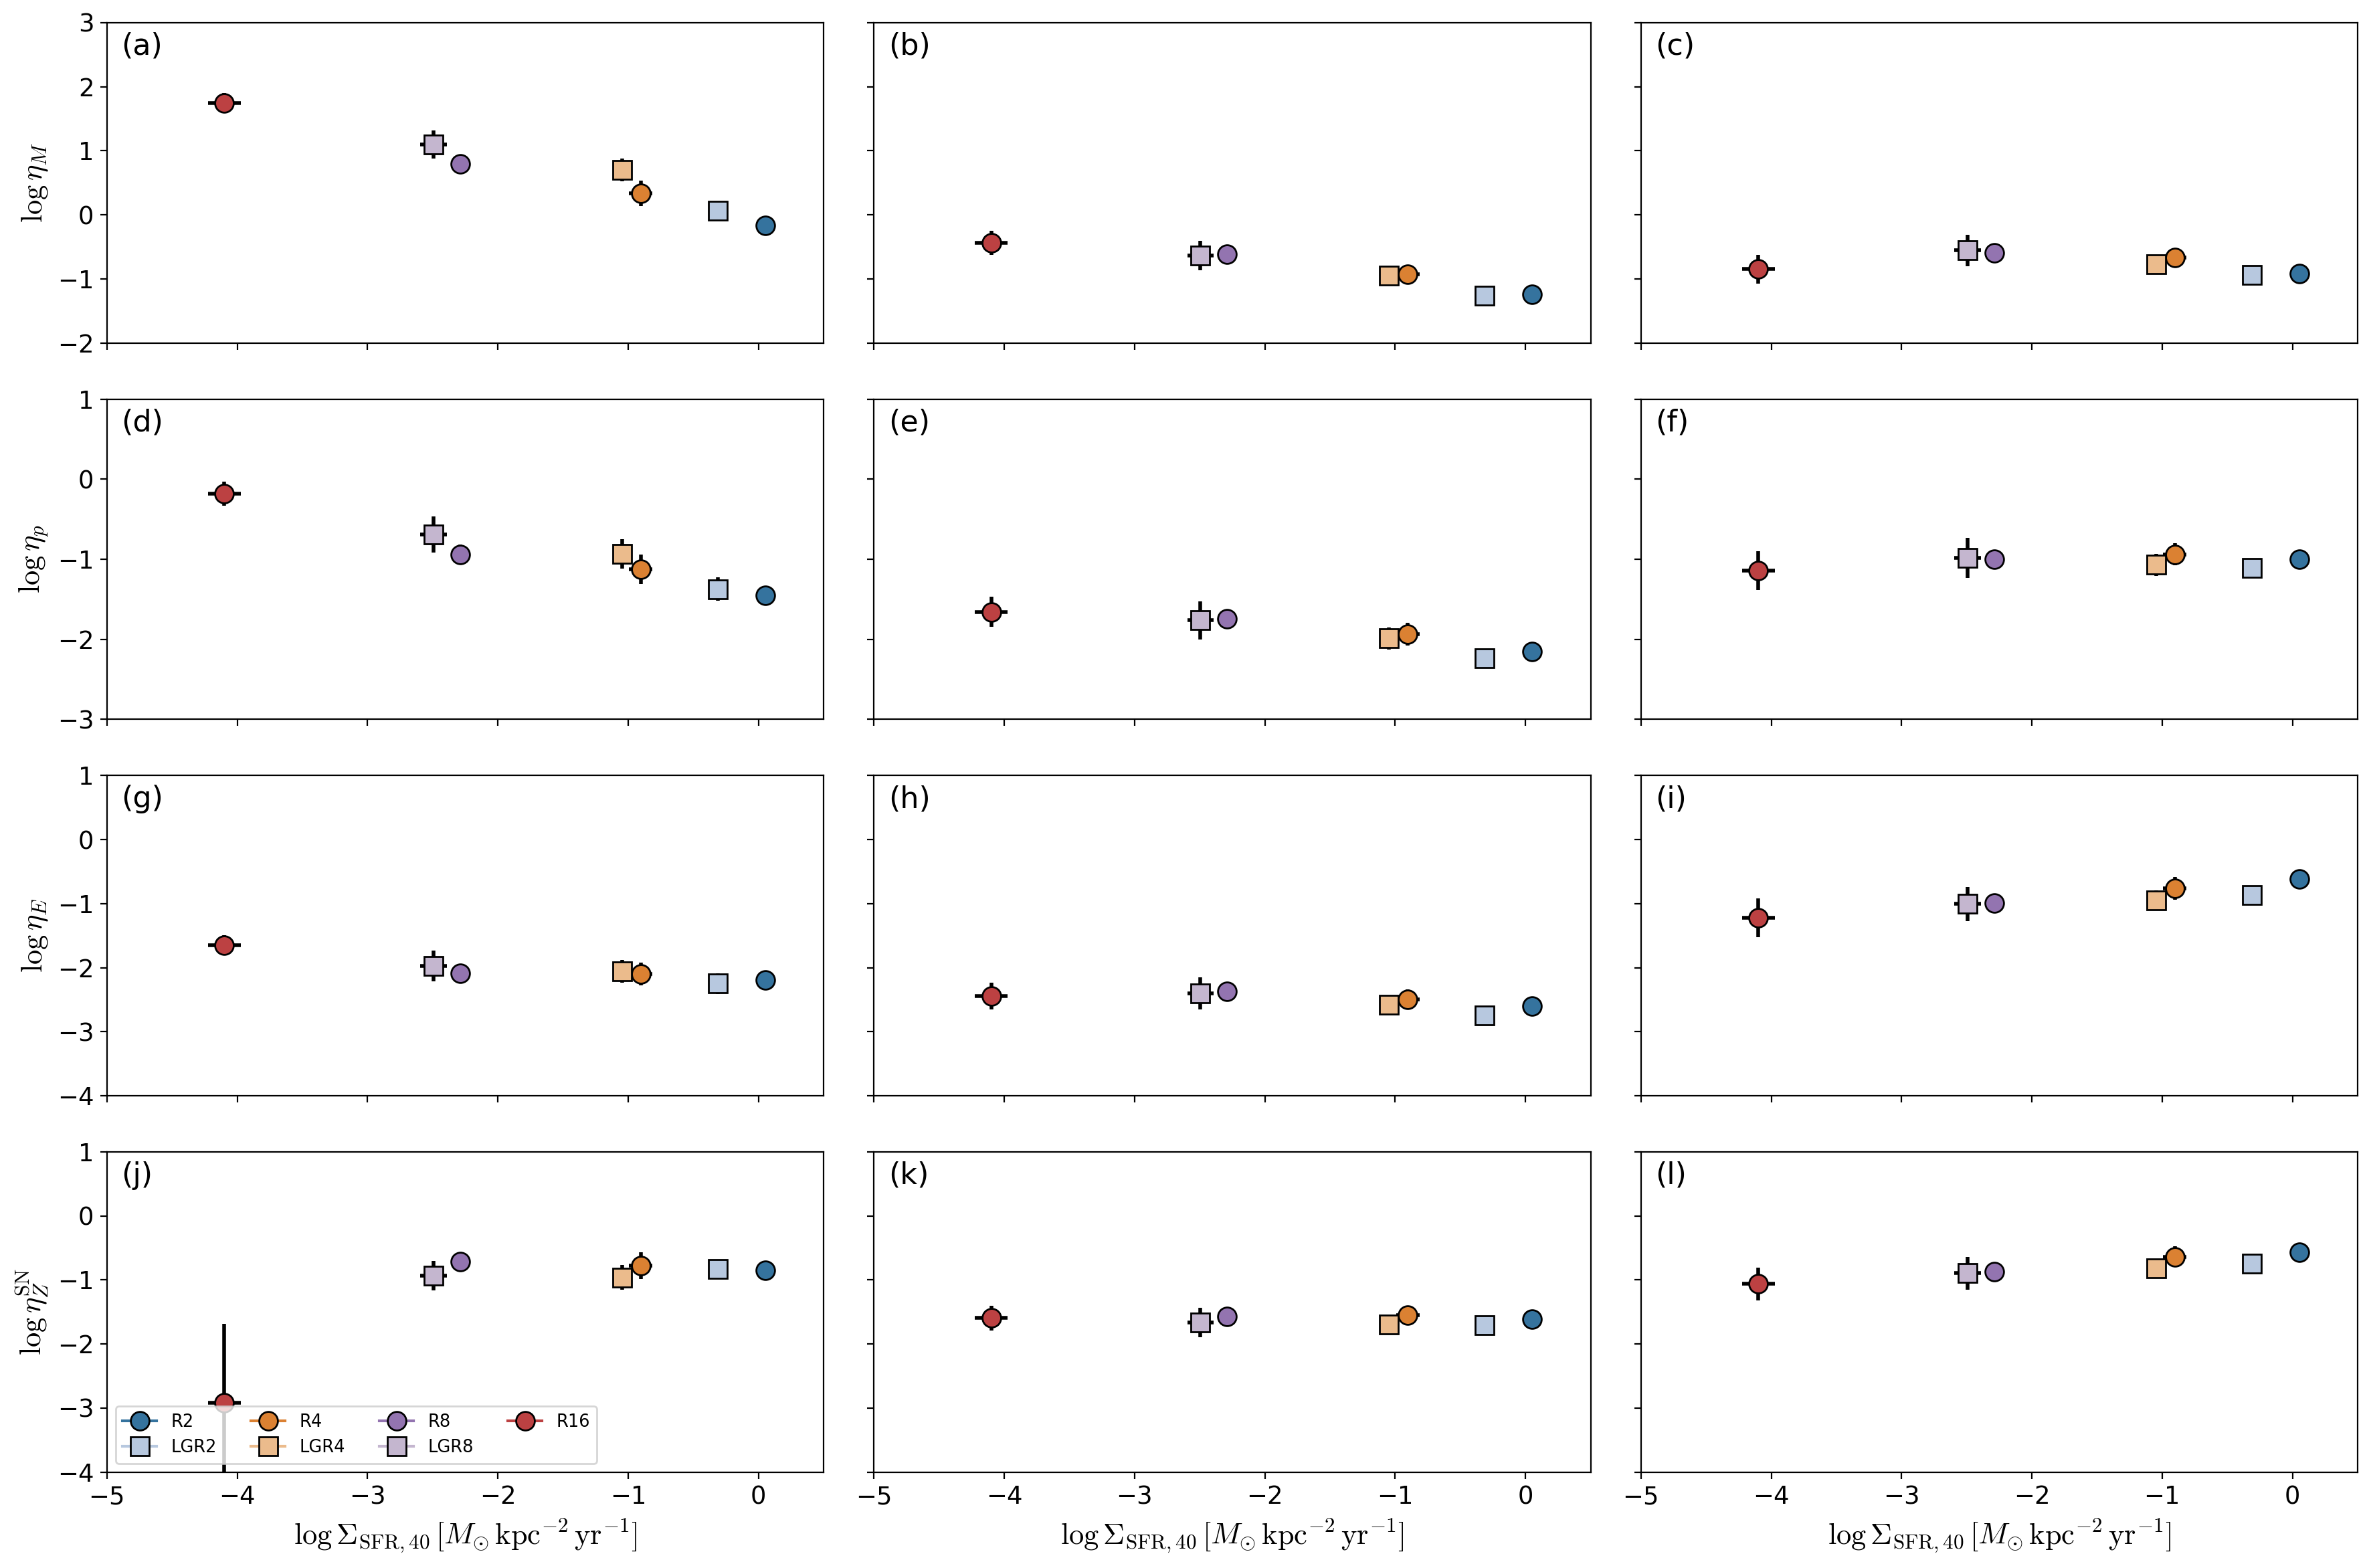

In [11]:
import seaborn as sns

colors=sns.color_palette('tab20',n_colors=20,desat=0.7)
colors=colors[:2]+colors[2:4]+colors[8:10]+colors[6:8]

markers=['o', 's', 'o', 's', 'o', 's', 'o']
names=['R2', 'LGR2', 'R4', 'LGR4', 'R8', 'LGR8', 'R16']

yfields=['mass_loading','mom_loading','energy_loading','metal_sn_loading']
labels=[r'$\eta_M$',r'$\eta_p$',r'$\eta_E$',r'$\eta_Z^{\rm SN}$']
phases=['cool','int','hot']

Nrows=len(yfields)
Ncols=len(phases)
z = 'H'
xfield = 'sfr40'
xlabel=r'$\Sigma_{{\rm SFR,40}}\,[M_{\odot}{\rm \, kpc^{-2}\,yr^{-1}}]$'

fig, axes = plt.subplots(Nrows,Ncols,figsize=(6*Ncols,3*Nrows),
                         sharex='col',sharey='row',squeeze=False)

for i,field in enumerate(yfields):
    for j,ph in enumerate(phases):
        plt.sca(axes[i,j])
        for name,c,m in zip(names,colors,markers):
            idx=(tmean['phase'] == ph) & (tmean['z'] == z) & (tmean['model'] == name)
            xmean = tmean[idx][xfield]
            ymean = tmean[idx][field]
            xstd = terr[idx][xfield]
            ystd = terr[idx][field]
            xlogstd= xstd/xmean/np.log(10)
            ylogstd= ystd/ymean/np.log(10)
            plt.errorbar(np.log10(xmean),np.log10(ymean),
                         xerr=xlogstd,yerr=ylogstd,
                         color=c,marker=m,label=name,
                         elinewidth=2,ecolor='k',markersize=10.0,
                         markeredgecolor='k',markeredgewidth=1,
                        )
        
# Decorating axes
axes[-1,0].legend(fontsize='xx-small',ncol=4,loc='lower left')
plt.setp(axes,'xlim',(-5,0.5))
axes[0,0].set_ylim(-2,3)
axes[1,0].set_ylim(-3,1)
axes[2,0].set_ylim(-4,1)
axes[3,0].set_ylim(-4,1)
for ax,lab in zip(axes.flat,'abcdefghijklmnopqrstuvwxyz'):
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.annotate('({})'.format(lab),[0.02,0.90],xycoords='axes fraction')

for ax,lab in zip(axes[:,0],labels):
    ax.set_ylabel(r'$\log\,$'+lab)
plt.setp(axes[-1,:],'xlabel',r'$\log\,$'+xlabel)
plt.tight_layout()

# Figure 9

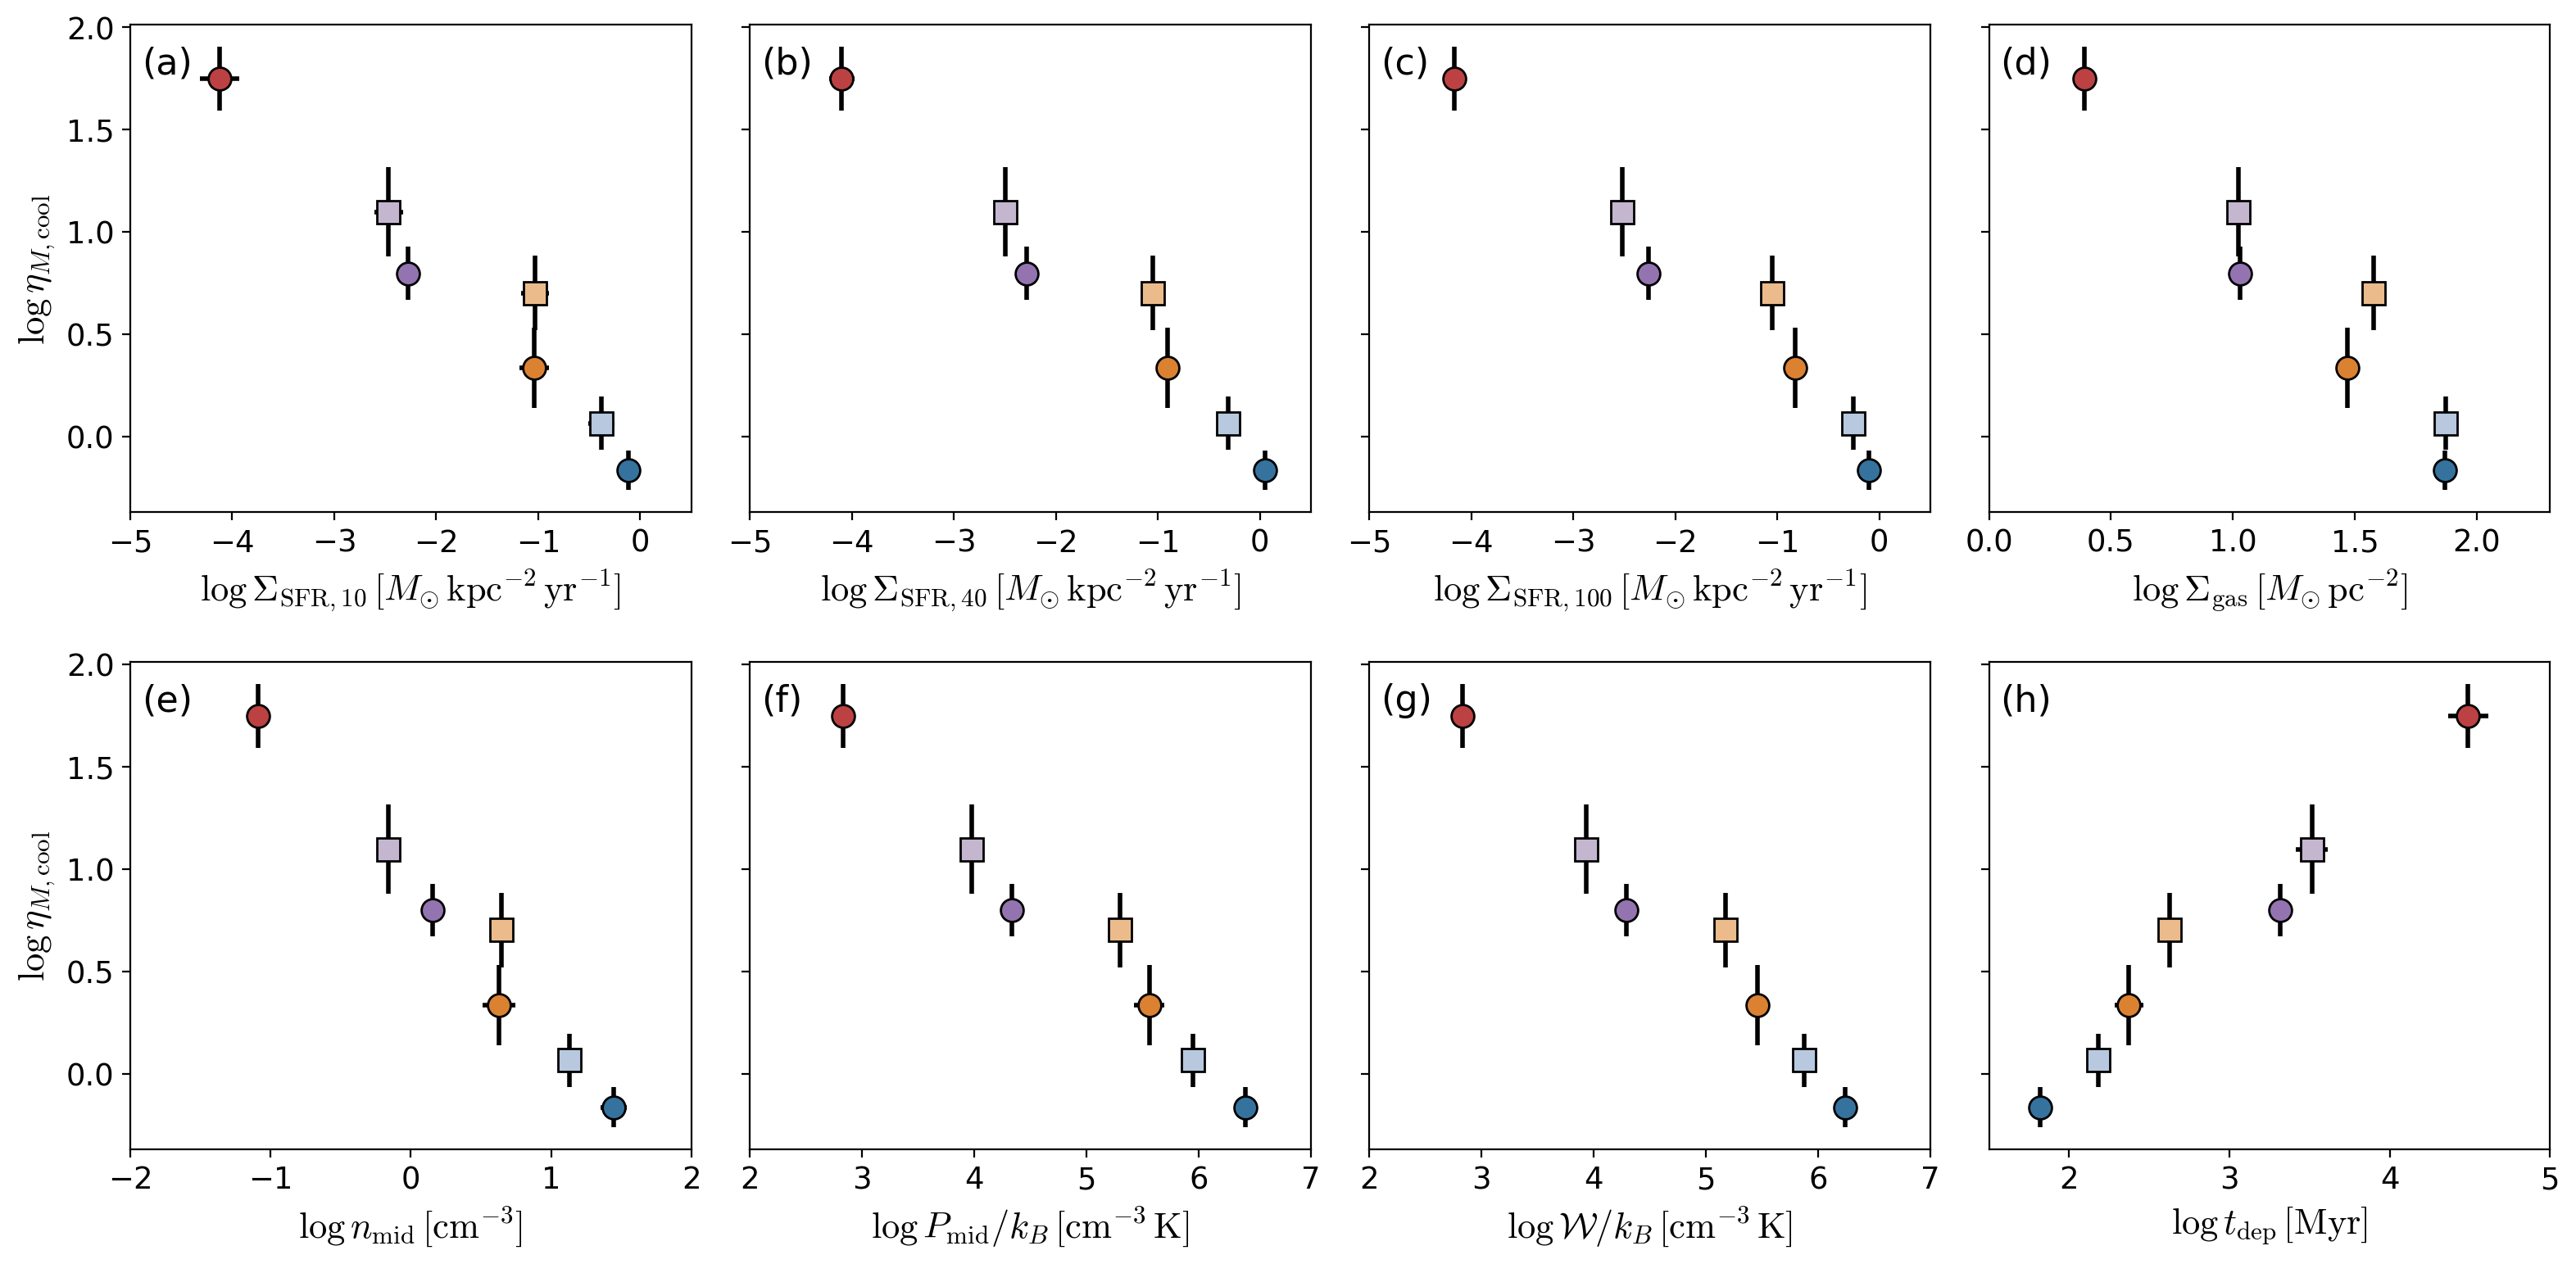

In [12]:
import seaborn as sns

colors=sns.color_palette('tab20',n_colors=20,desat=0.7)
colors=colors[:2]+colors[2:4]+colors[8:10]+colors[6:8]

markers=['o', 's', 'o', 's', 'o', 's', 'o']
names=['R2', 'LGR2', 'R4', 'LGR4', 'R8', 'LGR8', 'R16']

field='mass_loading'
ylabel=r'$\eta_{M, {\rm cool}}$'
ph='cool'
xfields = ['sfr10','sfr40','sfr100','surf','nmid_2p','Pmid_2p','W_2p','tdep40']
xlabels=[r'$\Sigma_{\rm SFR,10}\,[M_{\odot}{\rm \, kpc^{-2}\,yr^{-1}}]$',
         r'$\Sigma_{\rm SFR,40}\,[M_{\odot}{\rm \, kpc^{-2}\,yr^{-1}}]$',
         r'$\Sigma_{\rm SFR,100}\,[M_{\odot}{\rm \, kpc^{-2}\,yr^{-1}}]$',
         r'$\Sigma_{\rm gas}\,[M_{\odot}{\rm \, pc^{-2}}]$',
         r'$n_{\rm mid}\,[{\rm cm^{-3}}]$',
         r'$P_{\rm mid}/k_B\,[{\rm cm^{-3}\,K}]$',
         r'$\mathcal{W}/k_B\,[{\rm cm^{-3}\,K}]$',
         r'$t_{\rm dep}\,[{\rm Myr}]$',
        ]
xlimits=[[-5,0.5],[-5,0.5],[-5,0.5],[0,2.3],[-2,2],[2,7],[2,7],[1.5,5]]
z = 'H'           
fig,axes=plt.subplots(2,4,sharey=True,
                      figsize=(16,8)
                     )

for ax, xfield in zip(axes.flat,xfields):
    plt.sca(ax)
    for name,c,m in zip(names,colors,markers):
        idx=(tmean['phase'] == ph) & (tmean['z'] == z) & (tmean['model'] == name)
        xmean = tmean[idx][xfield]
        ymean = tmean[idx][field]
        xstd = terr[idx][xfield]
        ystd = terr[idx][field]
        xlogstd= xstd/xmean/np.log(10)
        ylogstd= ystd/ymean/np.log(10)
        plt.errorbar(np.log10(xmean),np.log10(ymean),
                     xerr=xlogstd,yerr=ylogstd,
                     color=c,marker=m,label=name,
                     elinewidth=2,ecolor='k',markersize=10.0,
                     markeredgecolor='k',markeredgewidth=1,
                    )
        
# Decorating axes
for ax,lab,xlab,xlim in zip(axes.flat,'abcdefghijklmnopqrstuvwxyz',xlabels,xlimits):
    ax.set_xlabel(r'$\log\,$'+xlab)
    ax.set_ylabel('')
    ax.set_xlim(xlim)
    ax.annotate('({})'.format(lab),[0.02,0.90],xycoords='axes fraction')

plt.setp(axes[:,0],'ylabel',r'$\log\,$'+ylabel)
plt.tight_layout()

# Figure 10 

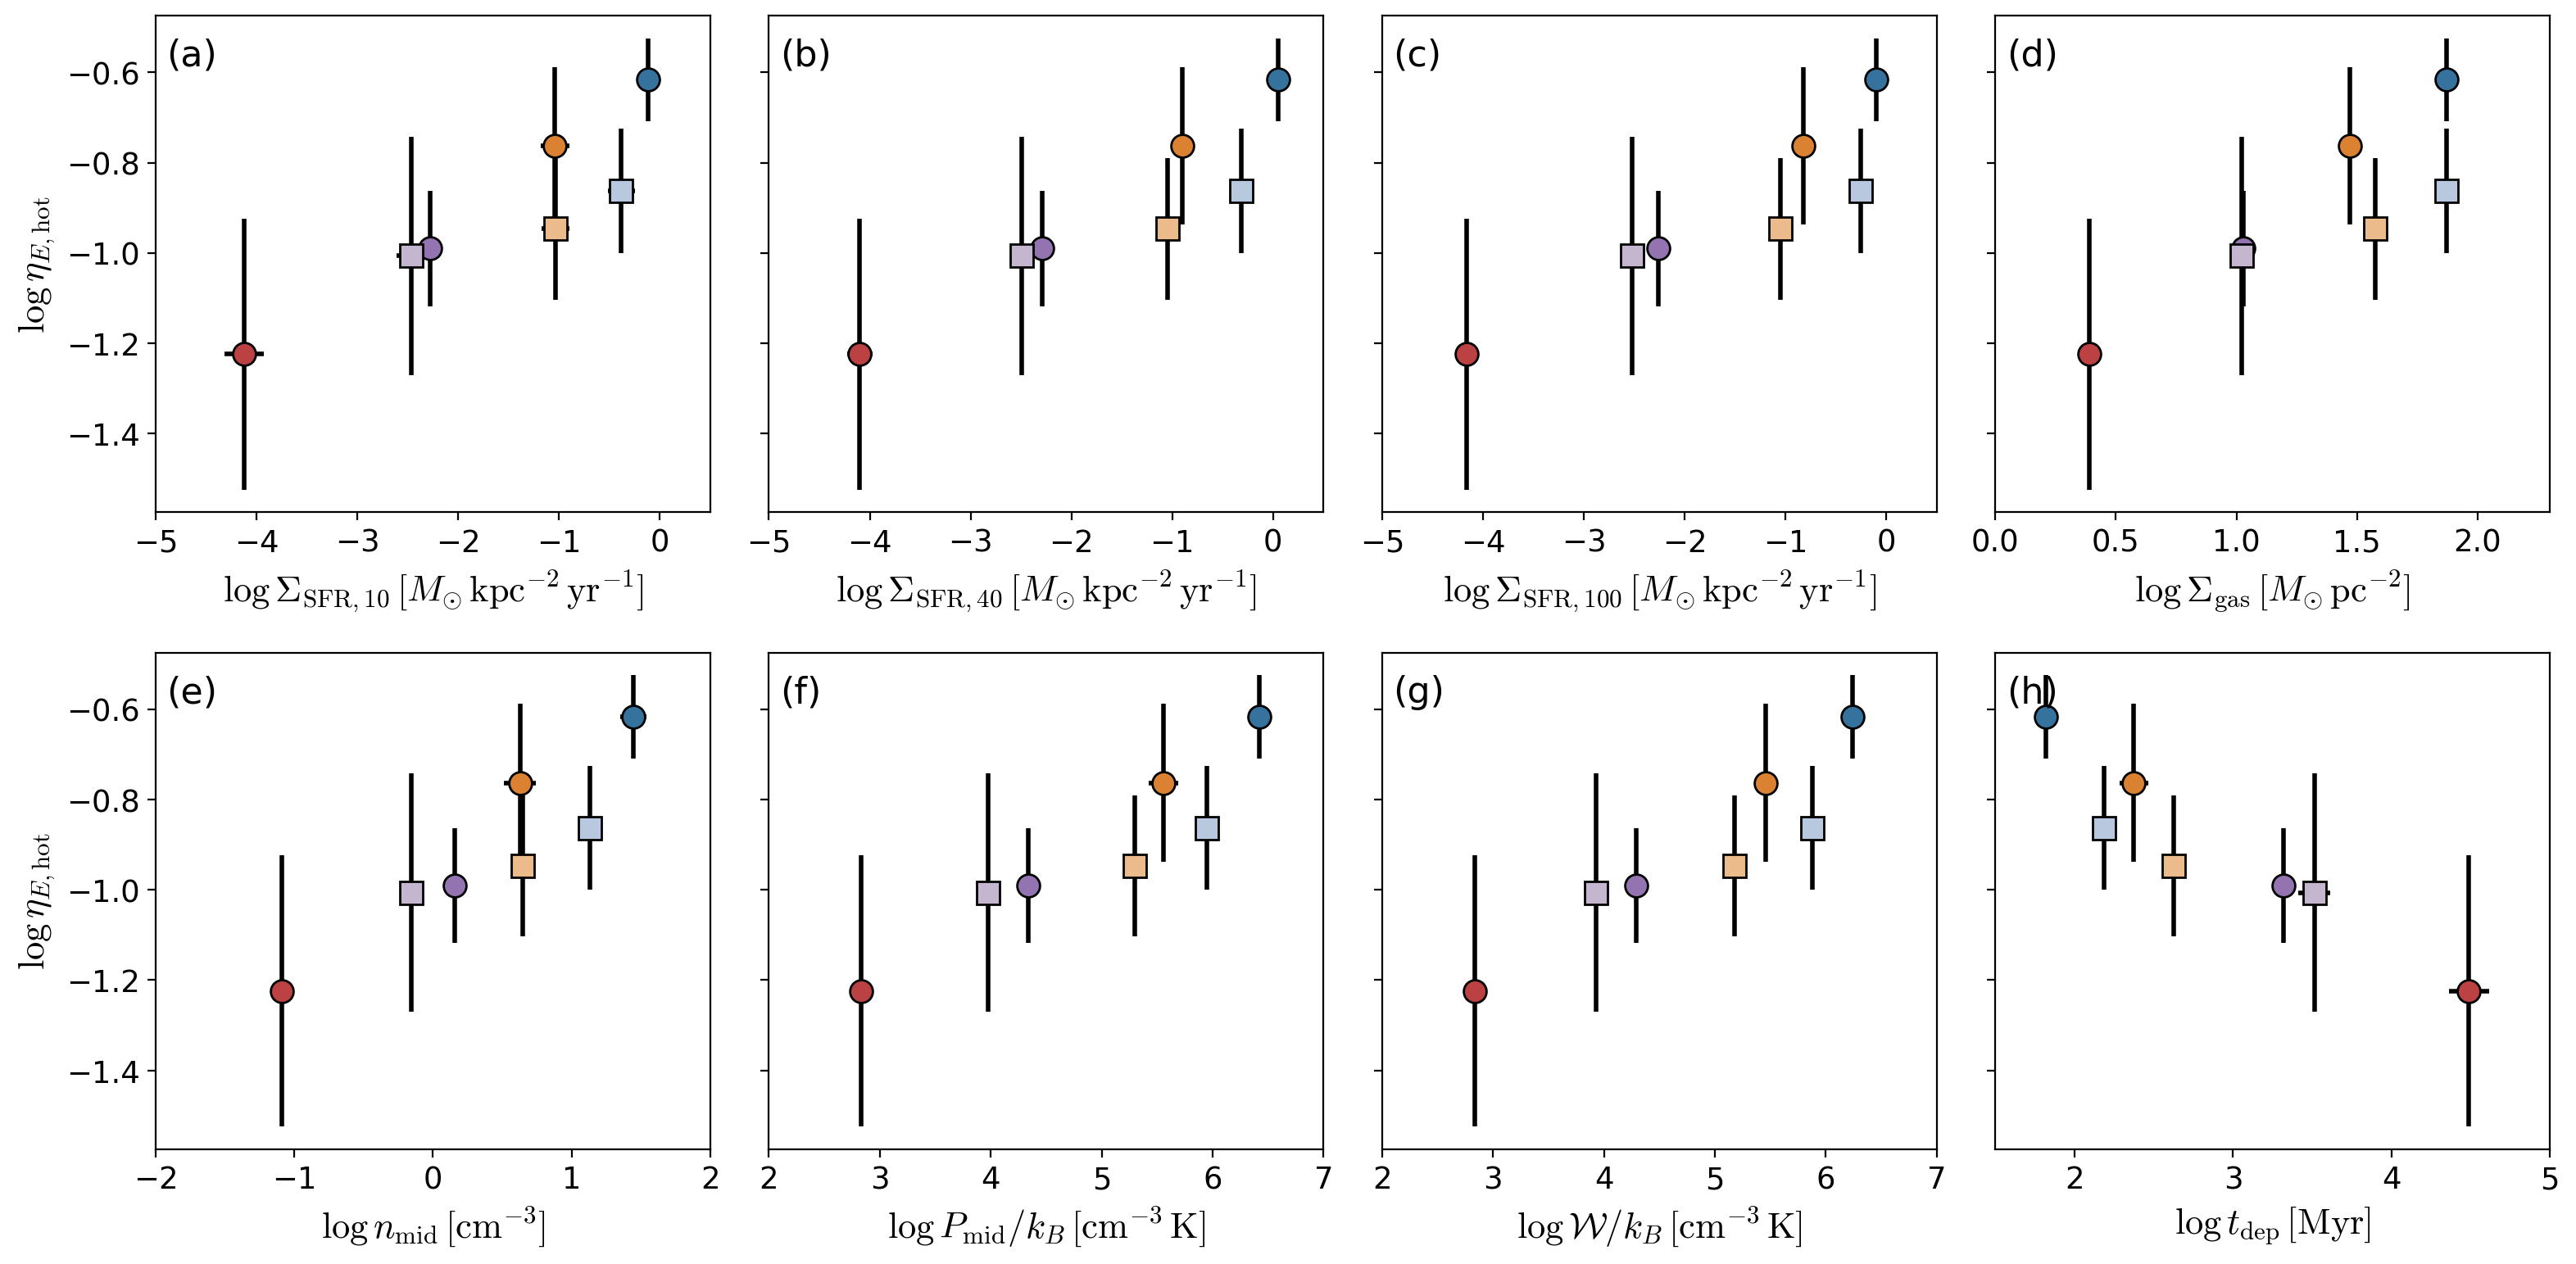

In [13]:
import seaborn as sns

colors=sns.color_palette('tab20',n_colors=20,desat=0.7)
colors=colors[:2]+colors[2:4]+colors[8:10]+colors[6:8]

markers=['o', 's', 'o', 's', 'o', 's', 'o']
names=['R2', 'LGR2', 'R4', 'LGR4', 'R8', 'LGR8', 'R16']

field='energy_loading'
ylabel=r'$\eta_{E, {\rm hot}}$'
ph='hot'
xfields = ['sfr10','sfr40','sfr100','surf','nmid_2p','Pmid_2p','W_2p','tdep40']
xlabels=[r'$\Sigma_{\rm SFR,10}\,[M_{\odot}{\rm \, kpc^{-2}\,yr^{-1}}]$',
         r'$\Sigma_{\rm SFR,40}\,[M_{\odot}{\rm \, kpc^{-2}\,yr^{-1}}]$',
         r'$\Sigma_{\rm SFR,100}\,[M_{\odot}{\rm \, kpc^{-2}\,yr^{-1}}]$',
         r'$\Sigma_{\rm gas}\,[M_{\odot}{\rm \, pc^{-2}}]$',
         r'$n_{\rm mid}\,[{\rm cm^{-3}}]$',
         r'$P_{\rm mid}/k_B\,[{\rm cm^{-3}\,K}]$',
         r'$\mathcal{W}/k_B\,[{\rm cm^{-3}\,K}]$',
         r'$t_{\rm dep}\,[{\rm Myr}]$',
        ]
xlimits=[[-5,0.5],[-5,0.5],[-5,0.5],[0,2.3],[-2,2],[2,7],[2,7],[1.5,5]]
z = 'H'           
fig,axes=plt.subplots(2,4,sharey=True,
                      figsize=(16,8)
                     )

for ax, xfield in zip(axes.flat,xfields):
    plt.sca(ax)
    for name,c,m in zip(names,colors,markers):
        idx=(tmean['phase'] == ph) & (tmean['z'] == z) & (tmean['model'] == name)
        xmean = tmean[idx][xfield]
        ymean = tmean[idx][field]
        xstd = terr[idx][xfield]
        ystd = terr[idx][field]
        xlogstd= xstd/xmean/np.log(10)
        ylogstd= ystd/ymean/np.log(10)
        plt.errorbar(np.log10(xmean),np.log10(ymean),
                     xerr=xlogstd,yerr=ylogstd,
                     color=c,marker=m,label=name,
                     elinewidth=2,ecolor='k',markersize=10.0,
                     markeredgecolor='k',markeredgewidth=1,
                    )
        
# Decorating axes
for ax,lab,xlab,xlim in zip(axes.flat,'abcdefghijklmnopqrstuvwxyz',xlabels,xlimits):
    ax.set_xlabel(r'$\log\,$'+xlab)
    ax.set_ylabel('')
    ax.set_xlim(xlim)
    ax.annotate('({})'.format(lab),[0.02,0.90],xycoords='axes fraction')

plt.setp(axes[:,0],'ylabel',r'$\log\,$'+ylabel)
plt.tight_layout()

# Figure 11 

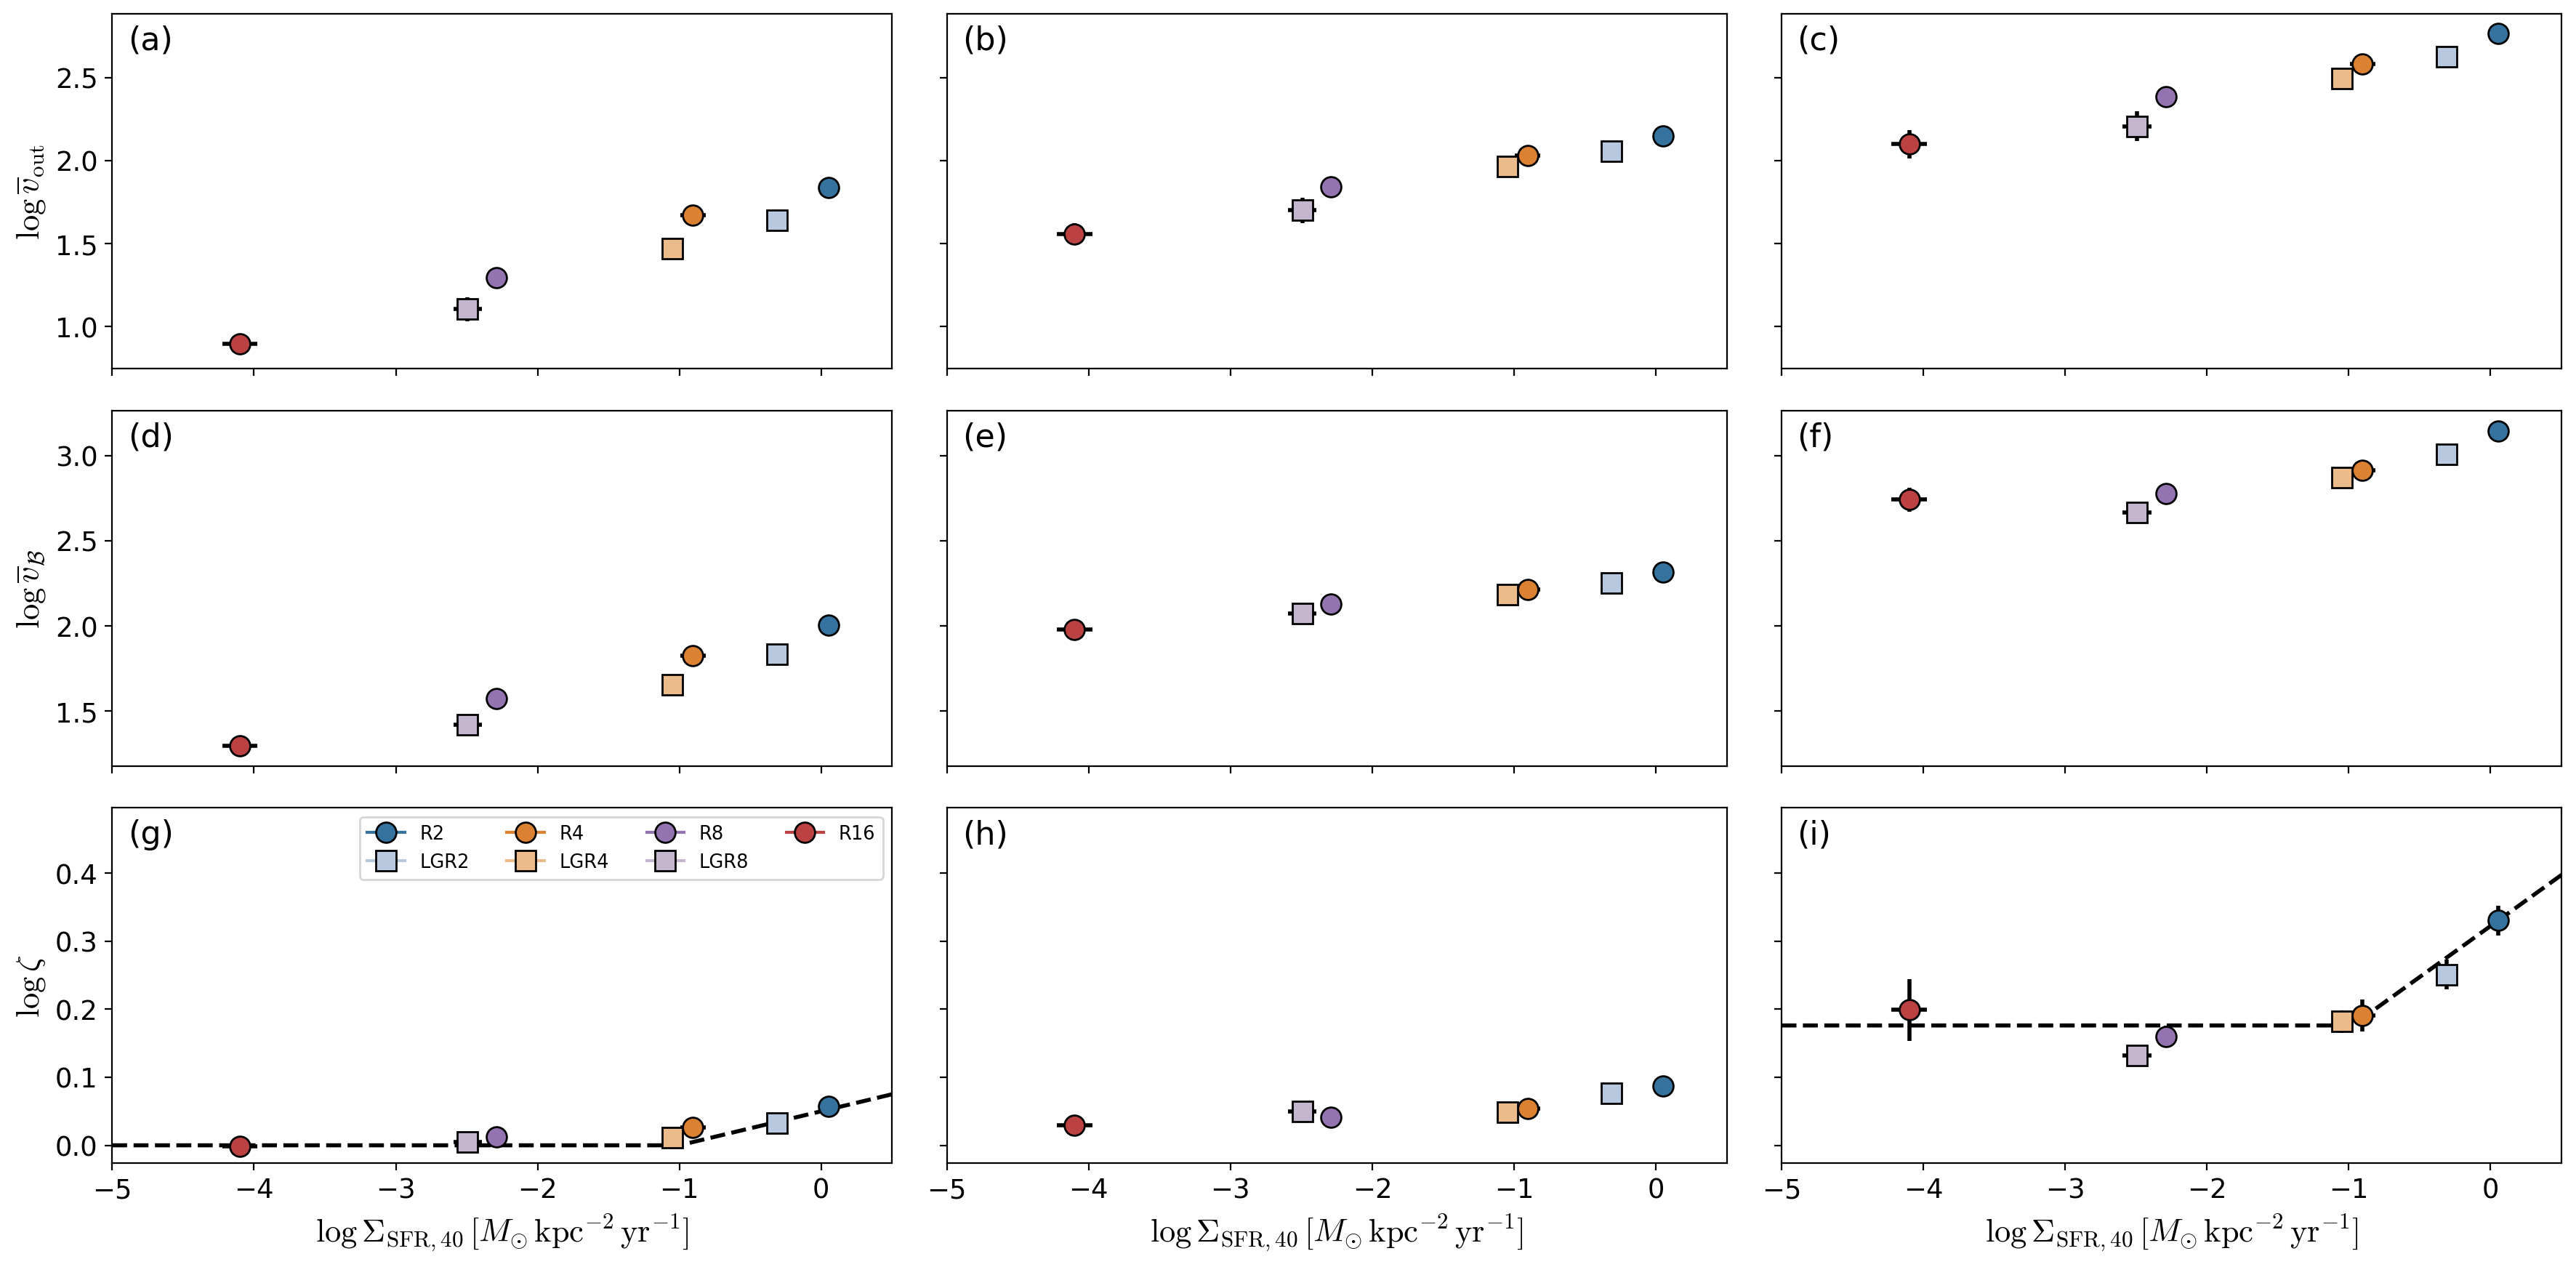

In [14]:
import seaborn as sns

colors=sns.color_palette('tab20',n_colors=20,desat=0.7)
colors=colors[:2]+colors[2:4]+colors[8:10]+colors[6:8]

markers=['o', 's', 'o', 's', 'o', 's', 'o']
names=['R2', 'LGR2', 'R4', 'LGR4', 'R8', 'LGR8', 'R16']

yfields=['vout_flux','vB','enrichment']
labels=[r'$\overline{v}_{\rm out}$',r'$\overline{v}_{\mathcal{B}}$',r'$\zeta$']
phases=['cool','int','hot']

Nrows=len(yfields)
Ncols=len(phases)
z = 'H'
xfield = 'sfr40'
xlabel=r'$\Sigma_{{\rm SFR,40}}\,[M_{\odot}{\rm \, kpc^{-2}\,yr^{-1}}]$'

fig, axes = plt.subplots(Nrows,Ncols,figsize=(6*Ncols,3*Nrows),
                         sharex='col',sharey='row',squeeze=False)

for i,field in enumerate(yfields):
    for j,ph in enumerate(phases):
        plt.sca(axes[i,j])
        for name,c,m in zip(names,colors,markers):
            idx=(tmean['phase'] == ph) & (tmean['z'] == z) & (tmean['model'] == name)
            xmean = tmean[idx][xfield]
            ymean = tmean[idx][field]
            xstd = terr[idx][xfield]
            ystd = terr[idx][field]
            xlogstd= xstd/xmean/np.log(10)
            ylogstd= ystd/ymean/np.log(10)
            plt.errorbar(np.log10(xmean),np.log10(ymean),
                         xerr=xlogstd,yerr=ylogstd,
                         color=c,marker=m,label=name,
                         elinewidth=2,ecolor='k',markersize=10.0,
                         markeredgecolor='k',markeredgewidth=1,
                        )
        
# Decorating axes
axes[-1,0].legend(fontsize='xx-small',ncol=4,loc='upper right')
plt.setp(axes,'xlim',(-5,0.5))

plt.sca(axes[-1,0])
x=np.linspace(-5,1,100)
y=np.max([0.05*(x+1),0.*x/x],axis=0)
plt.plot(x,y,ls='--',color='k',lw=2)

plt.sca(axes[-1,-1])
y=np.max([np.log10(2.1*(10.**x)**0.15),np.log10(1.5)*x/x],axis=0)
plt.plot(x,y,ls='--',color='k',lw=2)

for ax,lab in zip(axes.flat,'abcdefghijklmnopqrstuvwxyz'):
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.annotate('({})'.format(lab),[0.02,0.90],xycoords='axes fraction')

for ax,lab in zip(axes[:,0],labels):
    ax.set_ylabel(r'$\log\,$'+lab)
plt.setp(axes[-1,:],'xlabel',r'$\log\,$'+xlabel)
plt.tight_layout()

# Figure 12

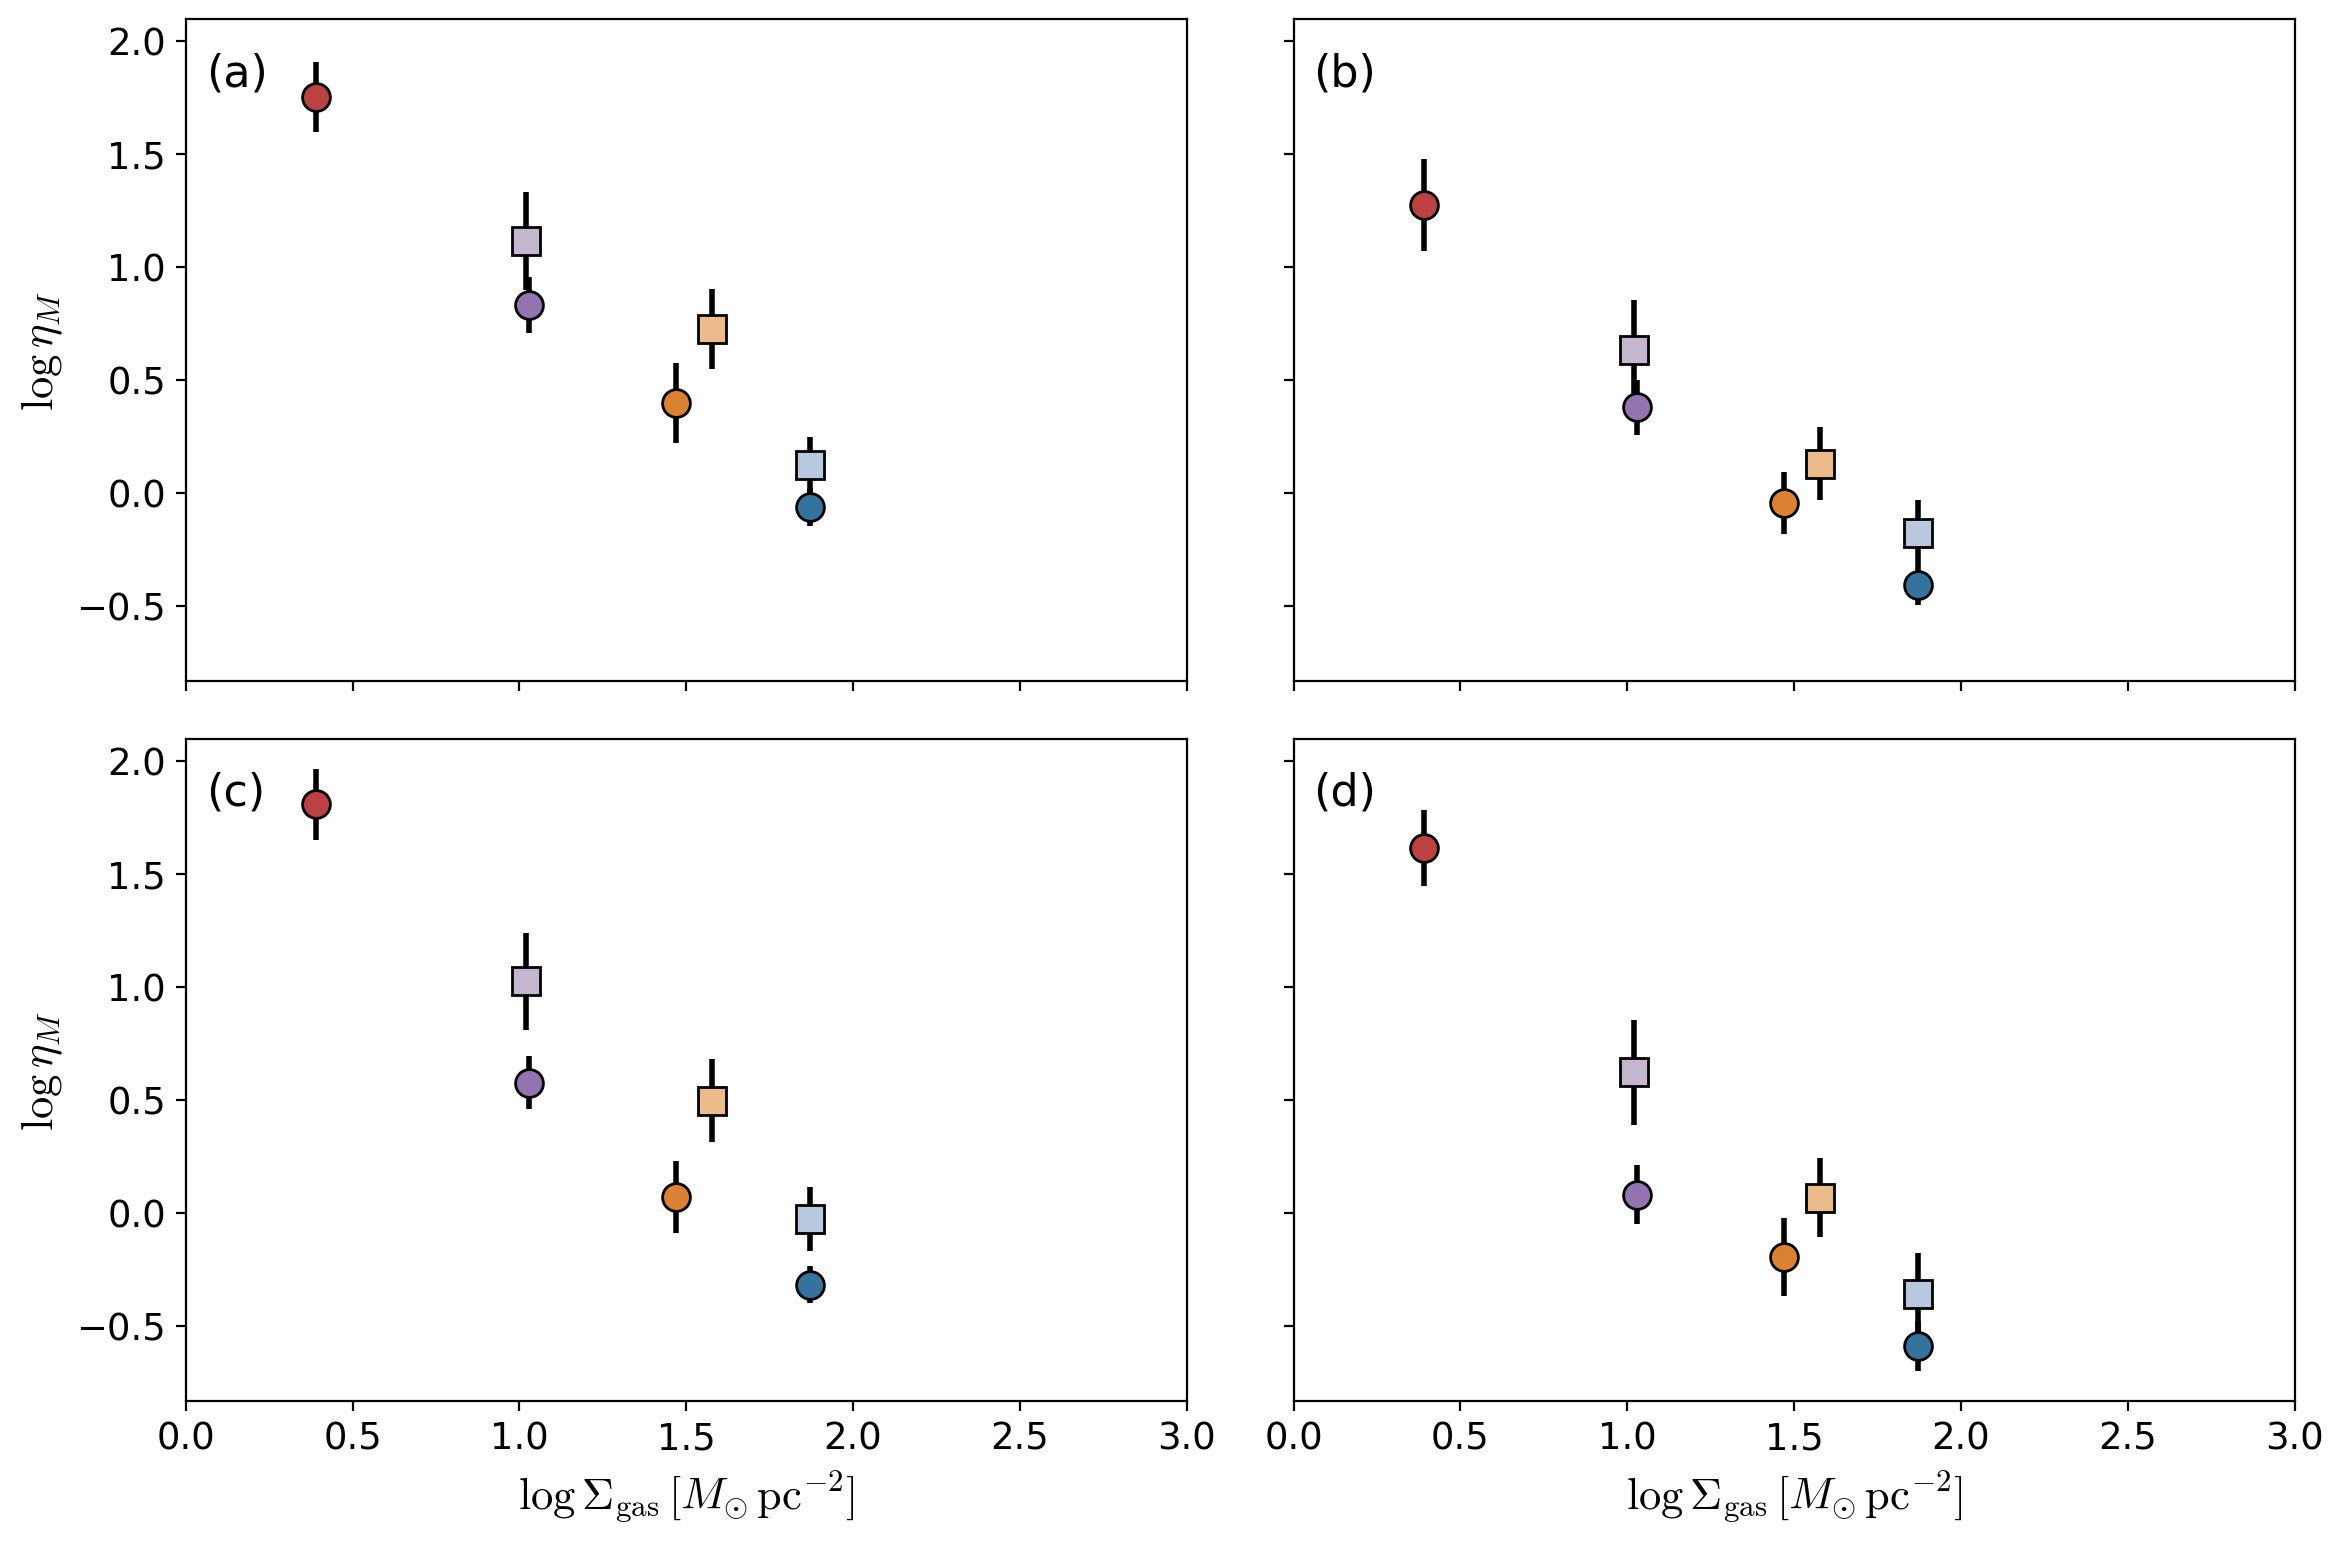

In [15]:
import seaborn as sns

colors=sns.color_palette('tab20',n_colors=20,desat=0.7)
colors=colors[:2]+colors[2:4]+colors[8:10]+colors[6:8]

markers=['o', 's', 'o', 's', 'o', 's', 'o']
names=['R2', 'LGR2', 'R4', 'LGR4', 'R8', 'LGR8', 'R16']

yfields=['mass_loading']
label=r'$\eta_M$'
ph='whole'

Nrows=len(yfields)
z = ['H','2H','500','1000']
xfield = 'surf'
xlabel=r'$\Sigma_{{\rm gas}}\,[M_{\odot}{\rm \, pc^{-2}}]$'


# xfield = 'sfr40'
# xlabel=r'$\Sigma_{{\rm SFR,40}}\,[M_{\odot}{\rm \, kpc^{-2}\,yr^{-1}}]$'

fig, axes = plt.subplots(2,2,sharex=True,sharey=True,figsize=(12,8),squeeze=False)
axes=axes.flatten()
for i,field in enumerate(yfields):
    for j,z0 in enumerate(z):
        plt.sca(axes[j])
        for name,c,m in zip(names,colors,markers):
            idx=(tmean['z'] == z0) & (tmean['model'] == name) & (tmean['phase'] == ph)
            xmean = tmean[idx][xfield]
            ymean = tmean[idx][field]
            xstd = terr[idx][xfield]
            ystd = terr[idx][field]
            xlogstd= xstd/xmean/np.log(10)
            ylogstd= ystd/ymean/np.log(10)
            plt.errorbar(np.log10(xmean),np.log10(ymean),
                         xerr=xlogstd,yerr=ylogstd,
                         color=c,marker=m,label=name,
                         elinewidth=2,ecolor='k',markersize=10.0,
                         markeredgecolor='k',markeredgewidth=1,
                        )
        
# Decorating axes
plt.setp(axes,'xlim',(0,3))

for ax,lab in zip(axes.flat,'abcdefghijklmnopqrstuvwxyz'):
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.annotate('({})'.format(lab),[0.02,0.90],xycoords='axes fraction')

plt.setp(axes[::2], 'ylabel',r'$\log\,$'+label)
plt.setp(axes[2:],'xlabel',r'$\log\,$'+xlabel)
plt.tight_layout()

# Figure 13 

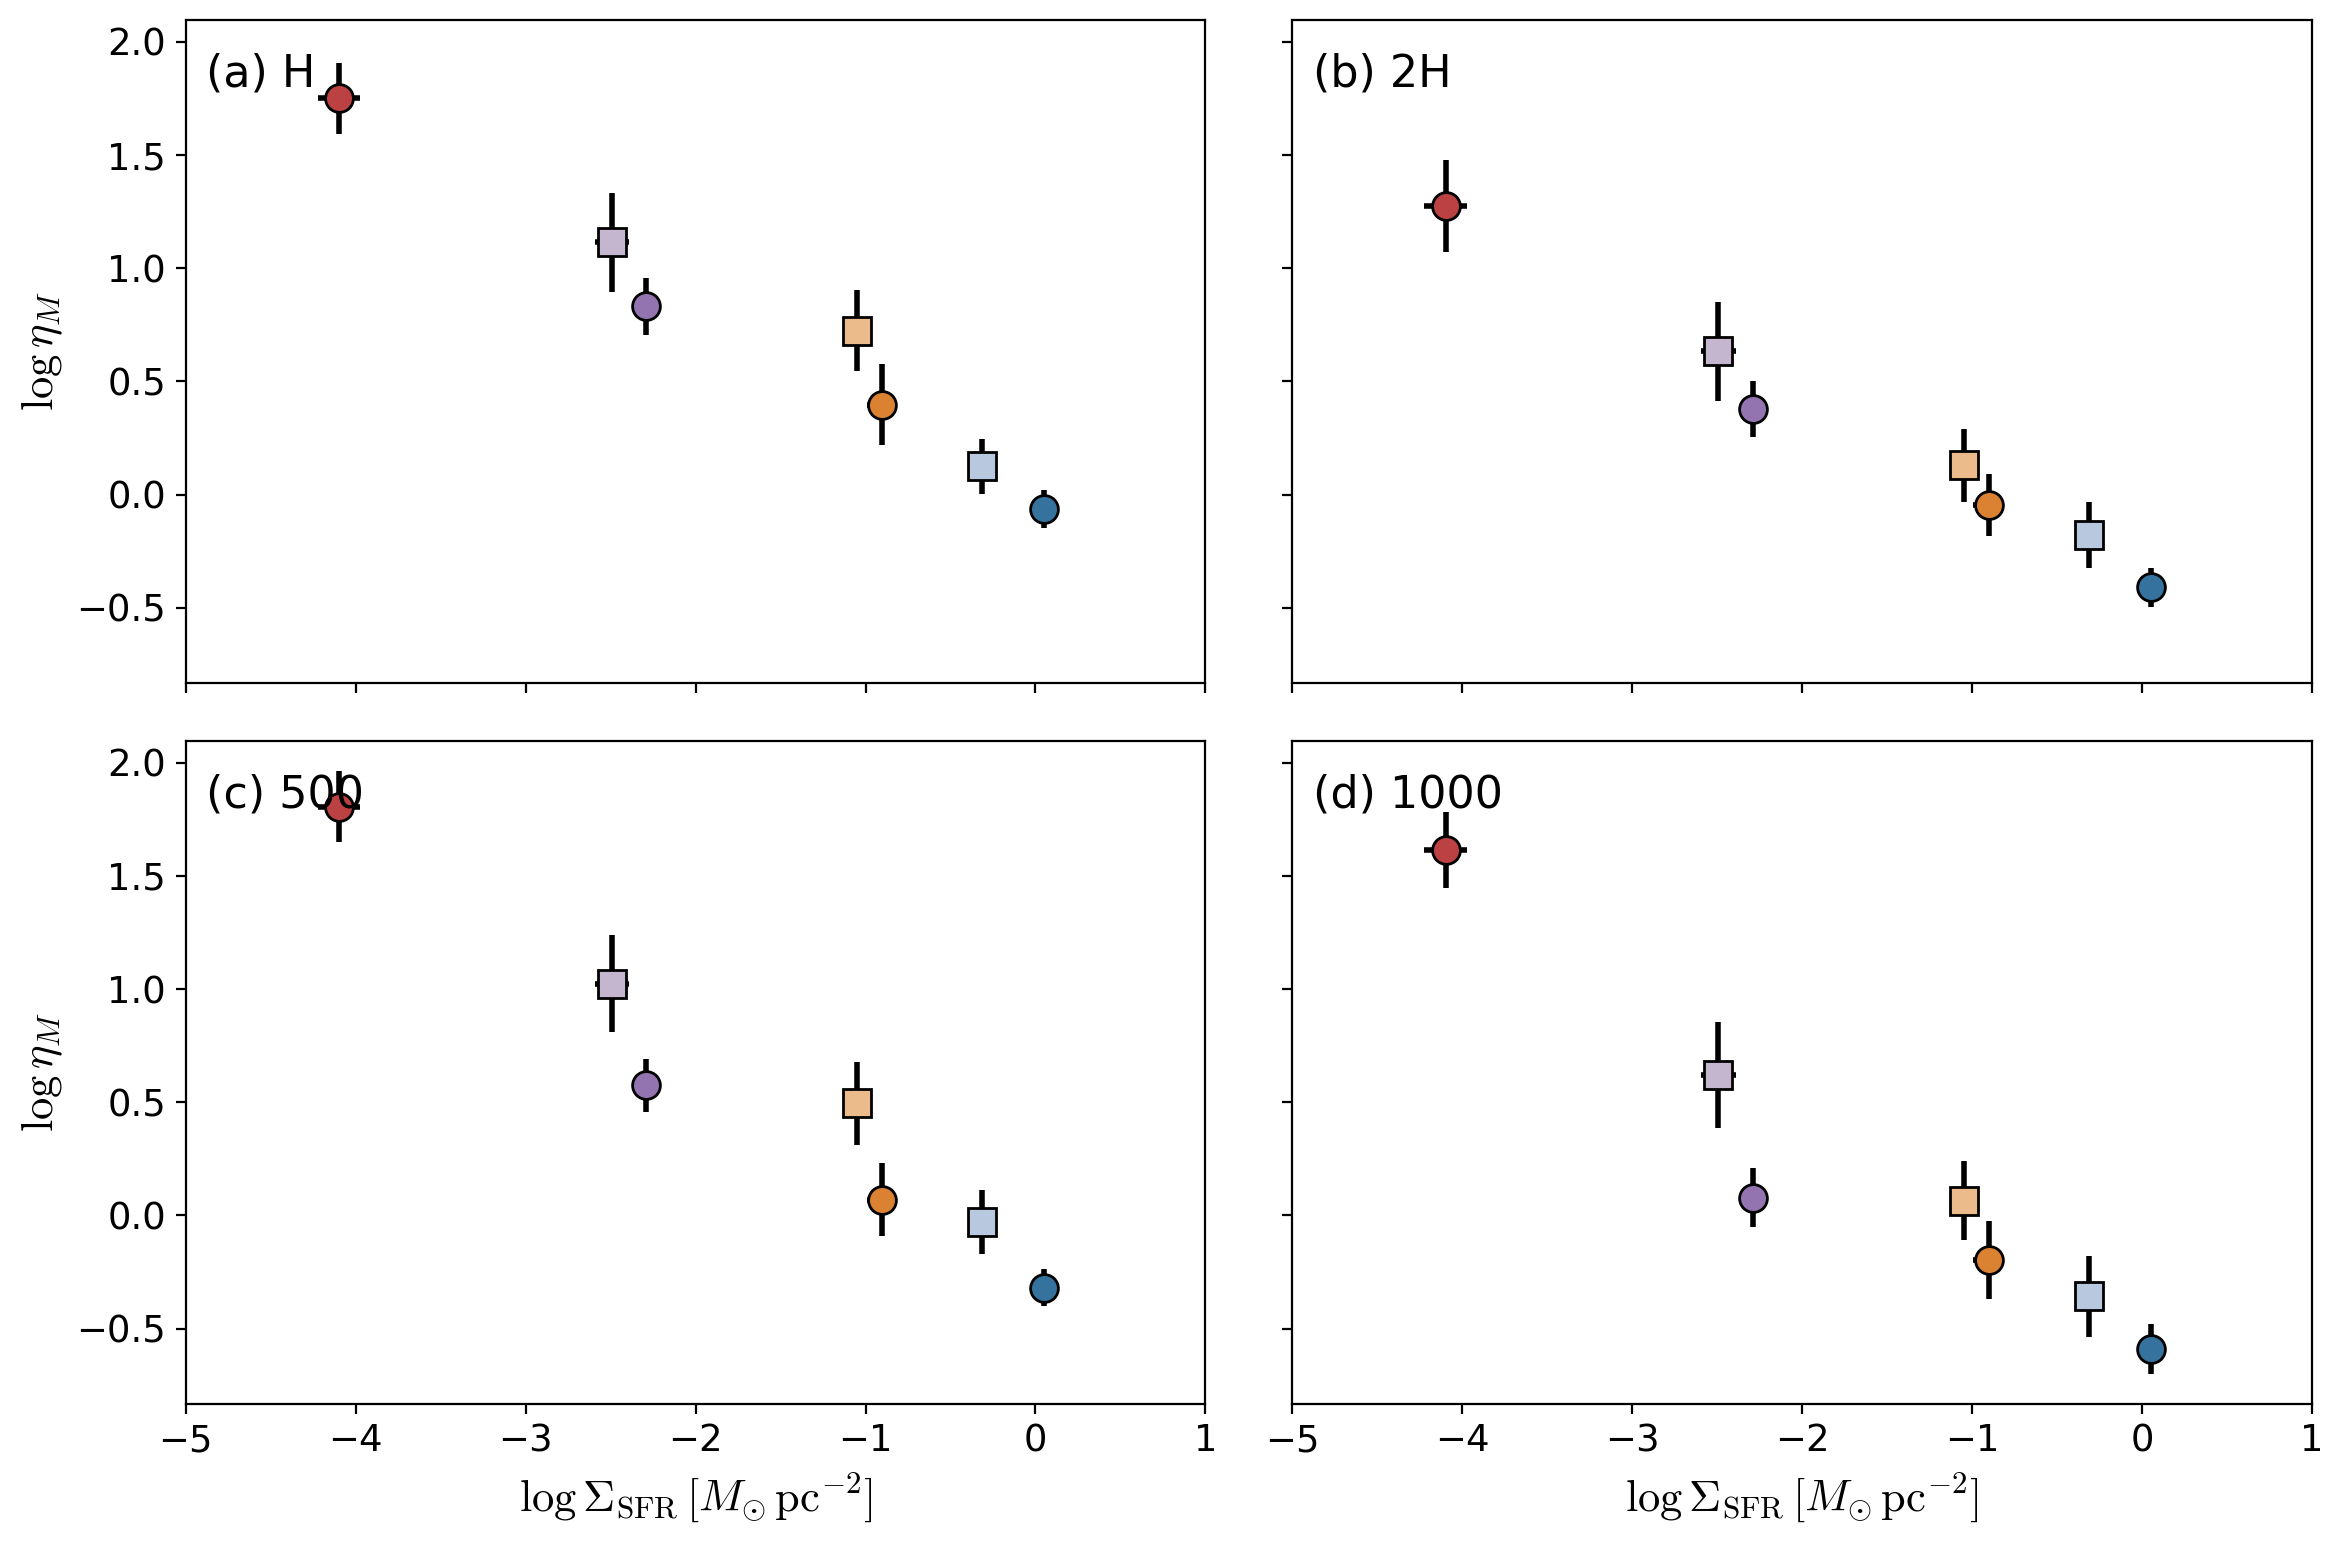

In [16]:
import seaborn as sns

colors=sns.color_palette('tab20',n_colors=20,desat=0.7)
colors=colors[:2]+colors[2:4]+colors[8:10]+colors[6:8]

markers=['o', 's', 'o', 's', 'o', 's', 'o']
names=['R2', 'LGR2', 'R4', 'LGR4', 'R8', 'LGR8', 'R16']

yfields=['mass_loading']
label=r'$\eta_M$'
ph='whole'

Nrows=len(yfields)
z = ['H','2H','500','1000']
xfield = 'sfr40'
xlabel=r'$\Sigma_{{\rm SFR}}\,[M_{\odot}{\rm \, pc^{-2}}]$'


# xfield = 'sfr40'
# xlabel=r'$\Sigma_{{\rm SFR,40}}\,[M_{\odot}{\rm \, kpc^{-2}\,yr^{-1}}]$'

fig, axes = plt.subplots(2,2,sharex=True,sharey=True,figsize=(12,8),squeeze=False)
axes=axes.flatten()
for i,field in enumerate(yfields):
    for j,z0 in enumerate(z):
        plt.sca(axes[j])
        for name,c,m in zip(names,colors,markers):
            idx=(tmean['z'] == z0) & (tmean['model'] == name) & (tmean['phase'] == ph)
            xmean = tmean[idx][xfield]
            ymean = tmean[idx][field]
            xstd = terr[idx][xfield]
            ystd = terr[idx][field]
            xlogstd= xstd/xmean/np.log(10)
            ylogstd= ystd/ymean/np.log(10)
            plt.errorbar(np.log10(xmean),np.log10(ymean),
                         xerr=xlogstd,yerr=ylogstd,
                         color=c,marker=m,label=name,
                         elinewidth=2,ecolor='k',markersize=10.0,
                         markeredgecolor='k',markeredgewidth=1,
                        )
        
# Decorating axes
plt.setp(axes,'xlim',(-5,1))

for ax,lab,z0 in zip(axes.flat,'abcdefghijklmnopqrstuvwxyz',z):
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.annotate('({}) {}'.format(lab,z0),[0.02,0.90],xycoords='axes fraction')

plt.setp(axes[::2], 'ylabel',r'$\log\,$'+label)
plt.setp(axes[2:],'xlabel',r'$\log\,$'+xlabel)
plt.tight_layout()

# Figure 14

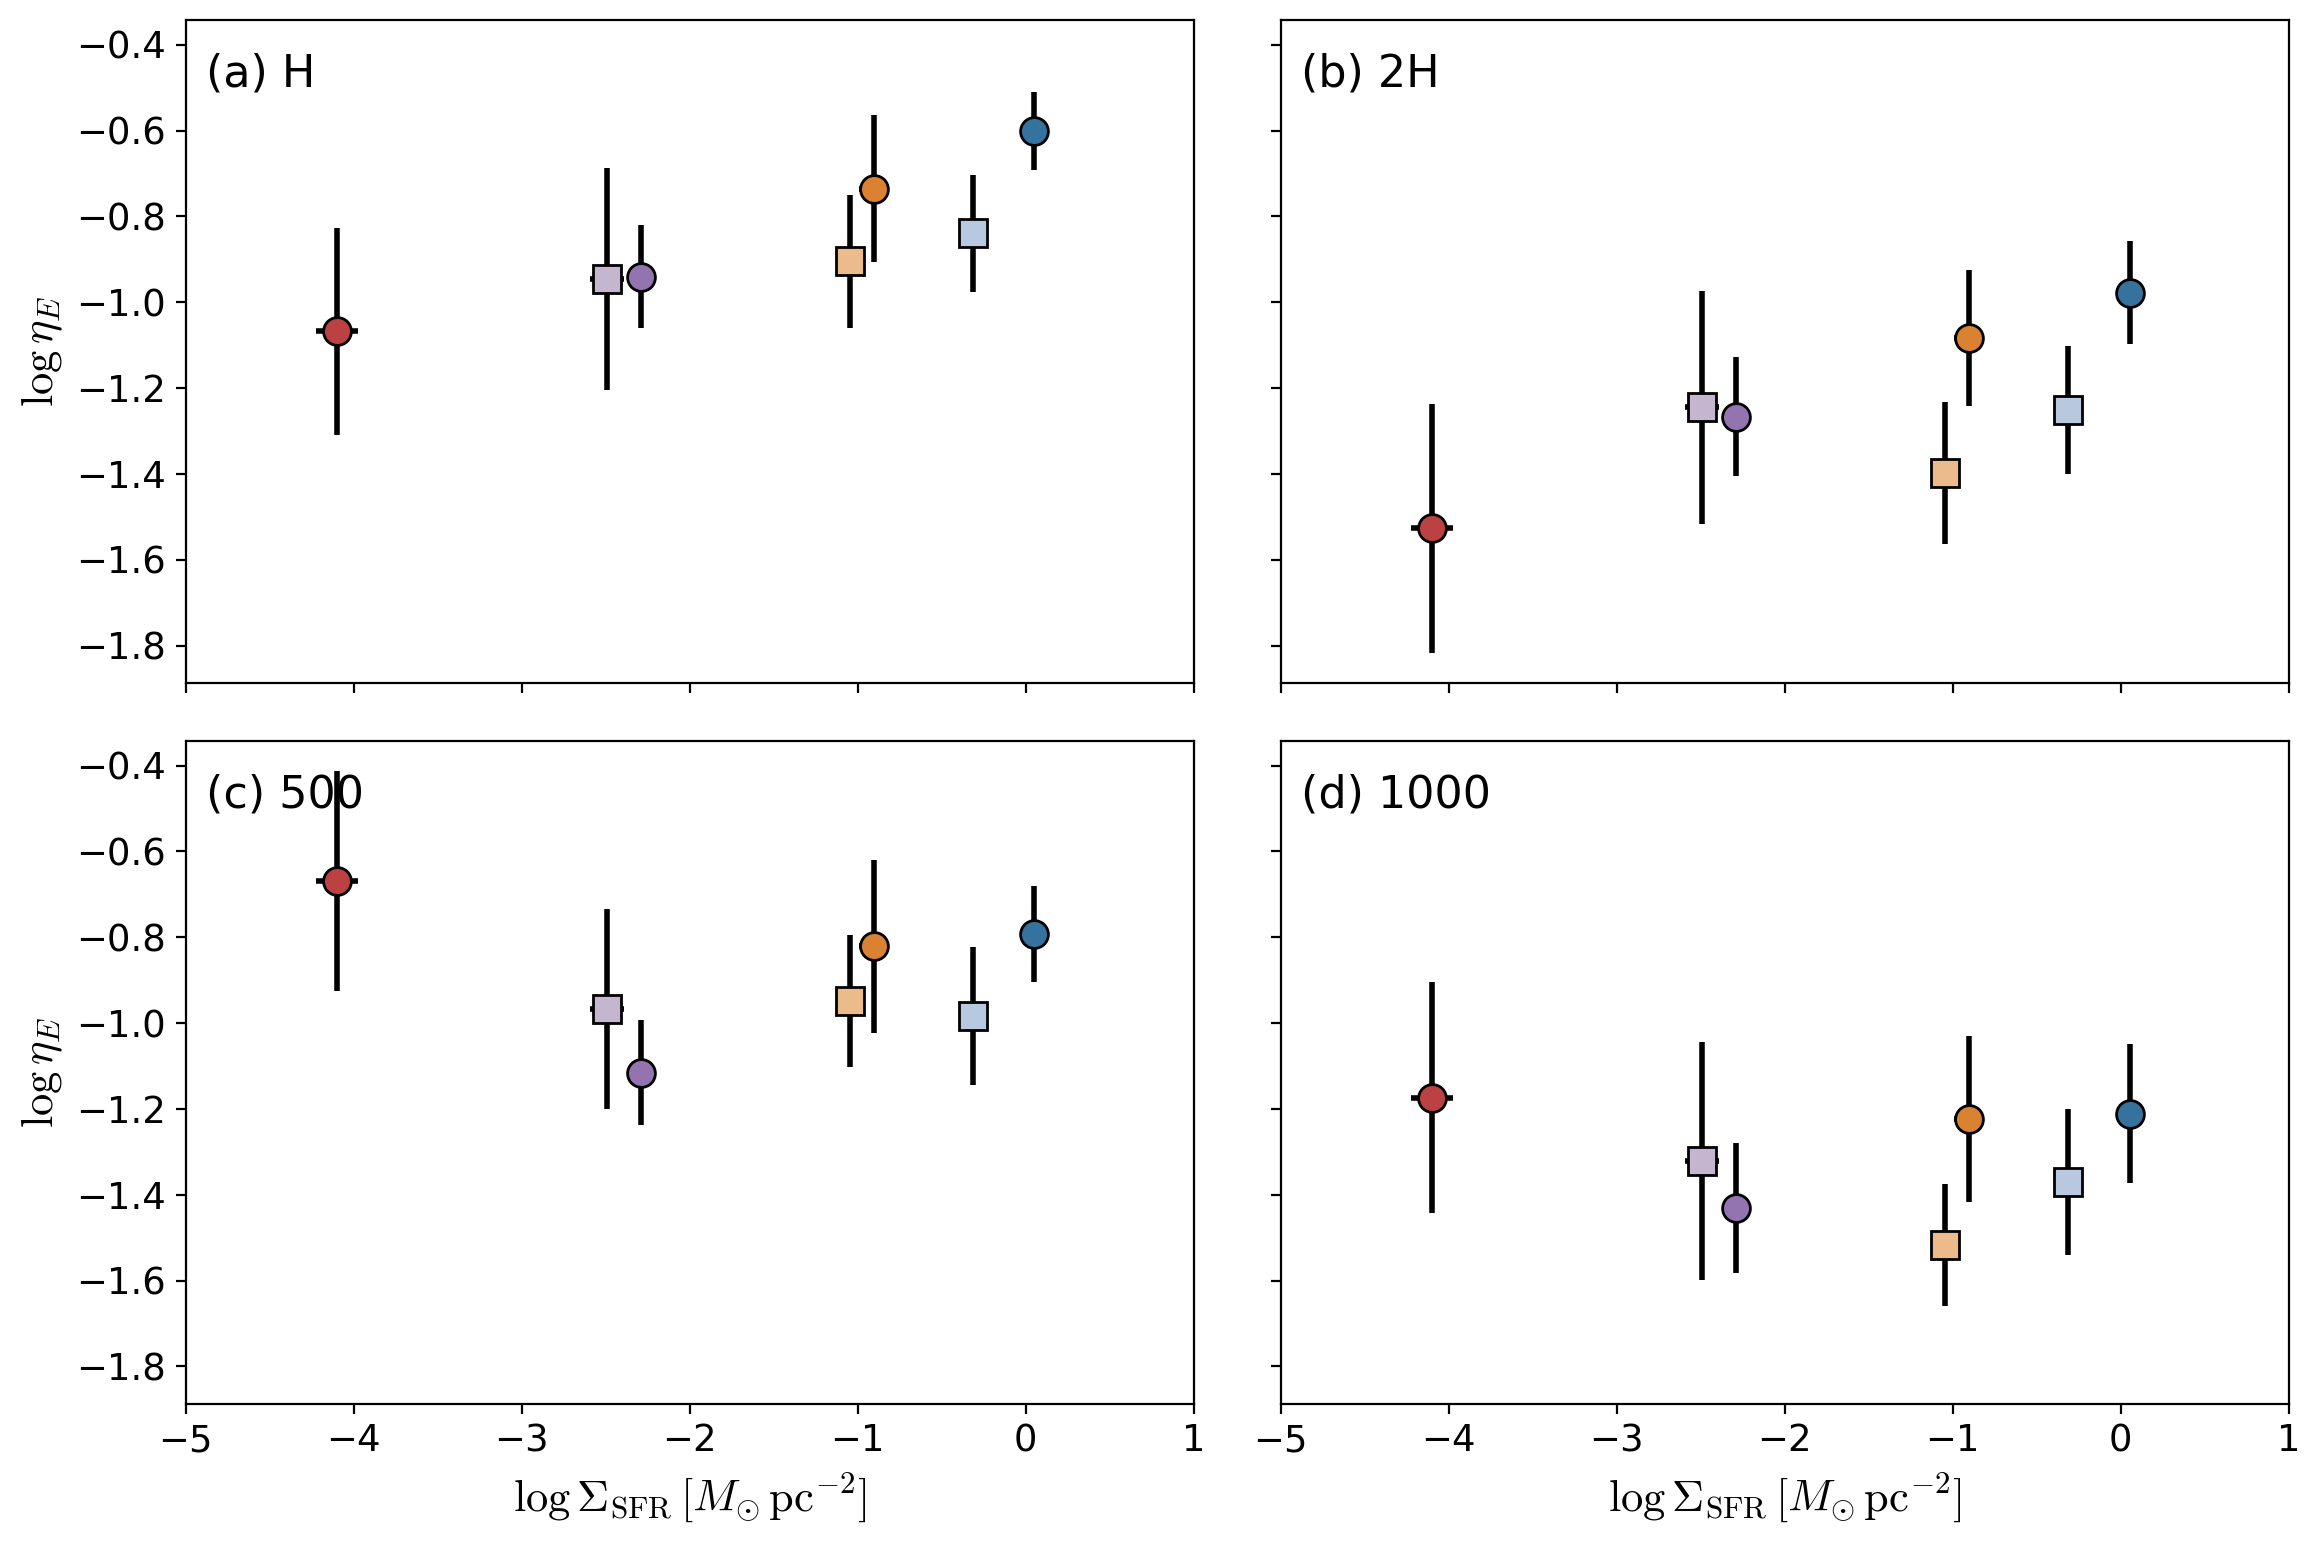

In [17]:
import seaborn as sns

colors=sns.color_palette('tab20',n_colors=20,desat=0.7)
colors=colors[:2]+colors[2:4]+colors[8:10]+colors[6:8]

markers=['o', 's', 'o', 's', 'o', 's', 'o']
names=['R2', 'LGR2', 'R4', 'LGR4', 'R8', 'LGR8', 'R16']

yfields=['energy_loading']
label=r'$\eta_E$'
ph='whole'

Nrows=len(yfields)
z = ['H','2H','500','1000']
xfield = 'sfr40'
xlabel=r'$\Sigma_{{\rm SFR}}\,[M_{\odot}{\rm \, pc^{-2}}]$'


# xfield = 'sfr40'
# xlabel=r'$\Sigma_{{\rm SFR,40}}\,[M_{\odot}{\rm \, kpc^{-2}\,yr^{-1}}]$'

fig, axes = plt.subplots(2,2,sharex=True,sharey=True,figsize=(12,8),squeeze=False)
axes=axes.flatten()
for i,field in enumerate(yfields):
    for j,z0 in enumerate(z):
        plt.sca(axes[j])
        for name,c,m in zip(names,colors,markers):
            idx=(tmean['z'] == z0) & (tmean['model'] == name) & (tmean['phase'] == ph)
            xmean = tmean[idx][xfield]
            ymean = tmean[idx][field]
            xstd = terr[idx][xfield]
            ystd = terr[idx][field]
            xlogstd= xstd/xmean/np.log(10)
            ylogstd= ystd/ymean/np.log(10)
            plt.errorbar(np.log10(xmean),np.log10(ymean),
                         xerr=xlogstd,yerr=ylogstd,
                         color=c,marker=m,label=name,
                         elinewidth=2,ecolor='k',markersize=10.0,
                         markeredgecolor='k',markeredgewidth=1,
                        )
        
# Decorating axes
plt.setp(axes,'xlim',(-5,1))

for ax,lab,z0 in zip(axes.flat,'abcdefghijklmnopqrstuvwxyz',z):
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.annotate('({}) {}'.format(lab,z0),[0.02,0.90],xycoords='axes fraction')

plt.setp(axes[::2], 'ylabel',r'$\log\,$'+label)
plt.setp(axes[2:],'xlabel',r'$\log\,$'+xlabel)
plt.tight_layout()

# Figure 19 

In [18]:
tmean['rho_sd']=tmean['Sigma_star'].quantity/(2*tmean['z_star'].quantity)+tmean['rho_dm'].quantity

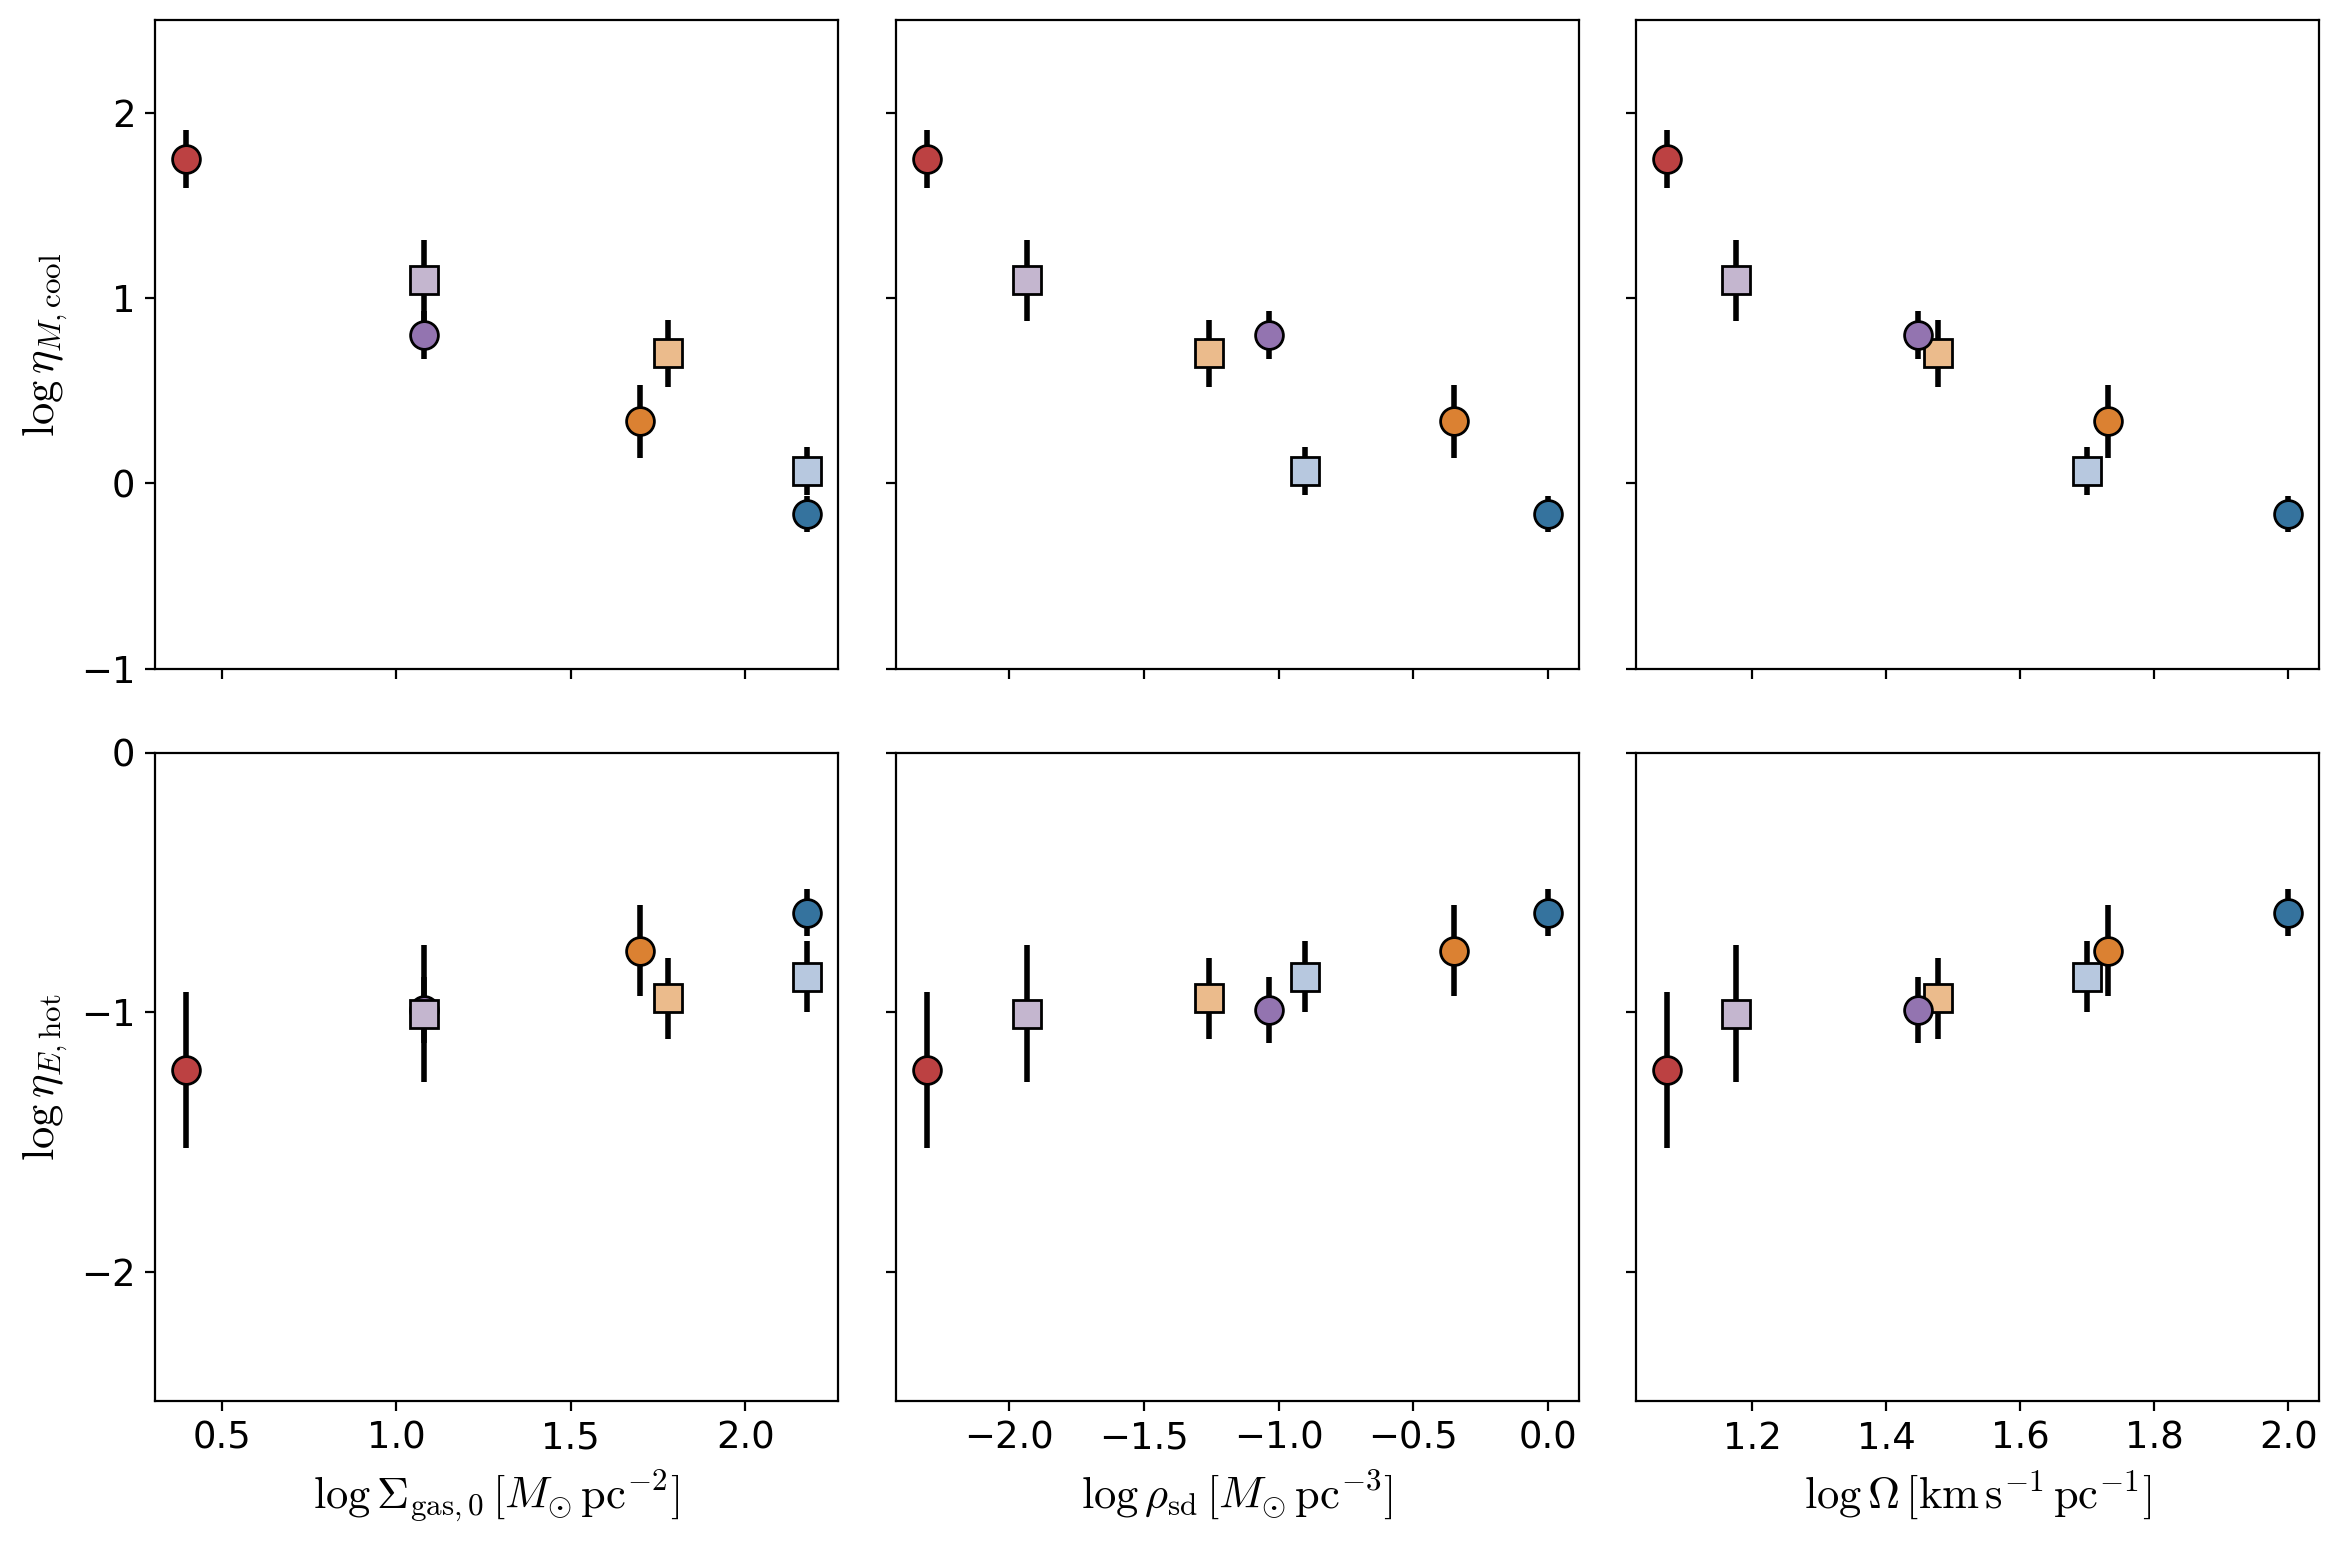

In [19]:
import seaborn as sns

colors=sns.color_palette('tab20',n_colors=20,desat=0.7)
colors=colors[:2]+colors[2:4]+colors[8:10]+colors[6:8]

markers=['o', 's', 'o', 's', 'o', 's', 'o']
names=['R2', 'LGR2', 'R4', 'LGR4', 'R8', 'LGR8', 'R16']

yfields=[('mass_loading','cool'),('energy_loading','hot')]
z0='H'

Nrows=len(yfields)
xfields = ['Sigma_gas0','rho_sd','Omega_0']
xlabels = [r'$\Sigma_{\rm gas,0}\,[M_{\odot}{\rm \, pc^{-2}}]$',
           r'$\rho_{\rm sd}\,[M_{\odot}{\rm \, pc^{-3}}]$',
           r'$\Omega\,[{\rm km\,s^{-1}\,pc^{-1}}]$',]

fig,axes = plt.subplots(2,3,sharey='row',sharex='col',figsize=(12,8))
pointplt_kwargs=dict(marker='o',ls='',markersize=3.0,alpha=1.0,markeredgewidth=0,zorder=0)
errplt_kwargs=dict(elinewidth=2,ecolor='k',markersize=10.0,
                   markeredgecolor='k',markeredgewidth=1,zorder=1)

for yf_ph,_axes in zip(yfields,axes):
    field,ph=yf_ph
    for xfield,ax in zip(xfields,_axes):
        plt.sca(ax)
        for name,c,m in zip(names,colors,markers):
            idx=(tmean['z'] == z0) & (tmean['model'] == name) & (tmean['phase'] == ph)
            xmean = tmean[idx][xfield]
            ymean = tmean[idx][field]
            ystd = terr[idx][field]
            ylogstd= ystd/ymean/np.log(10)
            plt.errorbar(np.log10(xmean),np.log10(ymean),
                         yerr=ylogstd,
                         color=c,marker=m,label=name,
                         elinewidth=2,ecolor='k',markersize=10.0,
                         markeredgecolor='k',markeredgewidth=1,
                        )
axes[0,0].set_ylim(-1,2.5)
axes[0,0].set_yticks([-1,0,1,2])
axes[1,0].set_ylim(-2.5,0)
axes[1,0].set_yticks([-2,-1,0])
for ax,xlab in zip(axes[1,:],xlabels):
    ax.set_xlabel(r'$\log\,$'+xlab)
axes[0,0].set_ylabel(r'$\log\,$'+r'$\eta_{M,{\rm cool}}$')
axes[1,0].set_ylabel(r'$\log\,$'+r'$\eta_{E,{\rm hot}}$')
plt.tight_layout()


# Fitting Example

In [21]:
# re-fitting with linmix
# note that the refitting will not give the identical posterior distributions 
# reported in the paper (Table 5), but should be statistically consistent
import linmix

ph='cool'
z='H'
xfield='sfr40'
yfield='mass_loading'

# selecting phase, height, xfield, and yfield from the table
# and construct arrays for 7 models
idx=(tmean['phase'] == ph) & (tmean['z'] == z)
xmean = tmean[idx][xfield]
ymean = tmean[idx][yfield]
xstd = terr[idx][xfield]
ystd = terr[idx][yfield]
xlog=np.log10(xmean)
ylog=np.log10(ymean)
xlogstd= xstd/xmean/np.log(10)
ylogstd= ystd/ymean/np.log(10)

In [22]:
# run MCMC
lm=linmix.LinMix(xlog,ylog,xsig=xlogstd,ysig=ylogstd)
lm.run_mcmc(silent=True)

In [23]:
def plot_posterior_hist(axes,chain,mean=True,interval=True,autorange=True,color='C0',**kwargs):

    fields=['alpha','beta','sigsqr','corr']
    for field,ax in zip(fields,axes.flat):
        plt.sca(ax)
        q=np.quantile(chain[field],[0.025,0.16,0.5,0.84,0.975])
        plt.hist(chain[field],bins=np.linspace(q[0],q[4],50),alpha=0.5,color=color,**kwargs);
        if mean: plt.axvline(q[2],color=color)
        if interval:
            plt.axvline(q[1],ls=':',color=color)
            plt.axvline(q[3],ls=':',color=color)
        plt.xlabel(field)
        if autorange: plt.xlim(q[0],q[4])

In [24]:
import corner

Text(0.95, 0.9, 'Cov$(\\alpha, \\beta)=+0.015$')

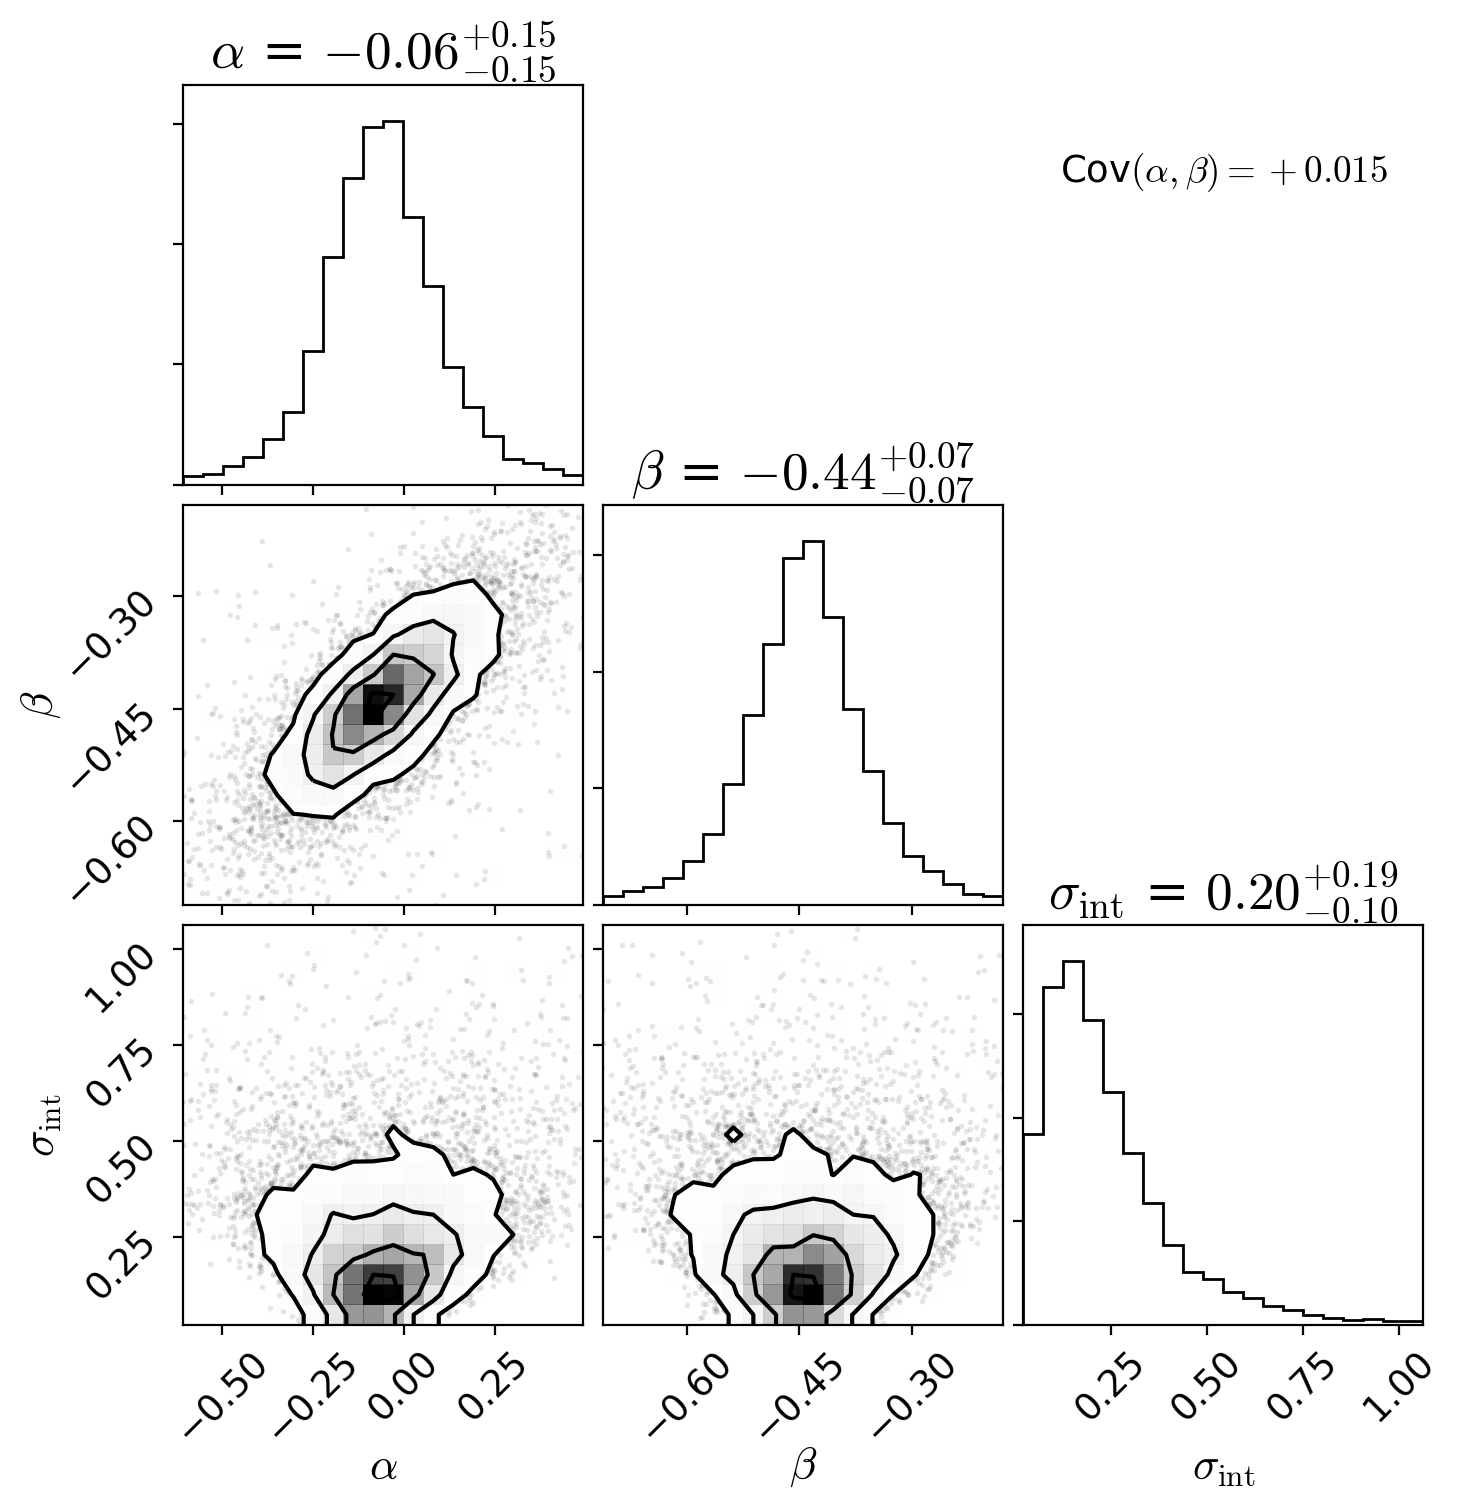

In [25]:
chain=lm.chain
cov=np.cov(chain['alpha'],chain['beta'])[1,0]
r1=np.quantile(chain['alpha'],[0.01,0.99])
r2=np.quantile(chain['beta'],[0.01,0.99])
r3=np.quantile(np.sqrt(chain['sigsqr']),[0.01,0.99])
f=corner.corner(np.array([chain['alpha'],chain['beta'],np.sqrt(chain['sigsqr'])]).T,range=[r1,r2,r3],
                show_titles=True,labels=[r'$\alpha$',r'$\beta$',r'$\sigma_{\rm int}$'],)
plt.annotate('Cov'+r'$(\alpha, \beta)={:+.3f}$'.format(cov),
             (0.95,0.9),xycoords='figure fraction',ha='right',va='top',fontsize='small')

In [26]:
def result_string(chain,sep='\n',table=False):
    result_str=[]
    for field,name in zip(['alpha','beta','sigsqr','corr'],
                          [r'\alpha',r'\beta',r'\sigma_{\rm int}',r'\rho']):
        q=np.quantile(chain[field],[0.16,0.5,0.84])
        if field is 'sigsqr':
            q=np.quantile(np.sqrt(chain[field]),[0.16,0.5,0.84])
        if table:
            result_str.append(display_quantiles(q))
        else:
            result_str.append(r'${}='.format(name)+display_quantiles(q)+'$')
        result_str.append(sep)
    return ' '.join(result_str[:-1])

def display_quantiles(q):
    med=q[1]
    upper=q[2]-q[1]
    lower=q[1]-q[0]
    fmt_str = '{val:.2f}^{{+{plus:.2f}}}_{{-{minus:.2f}}}'
    disp_str = fmt_str.format(val=med, plus=upper, minus=lower)
    return disp_str

In [27]:
def plot_mcmc_result(chain,xmin,xmax,color='k',
                     intrinsic_scatter=True,result_str=True,
                     interval=True,median=True,**kwargs):
    xs=np.linspace(xmin,xmax,100)
    a=chain['alpha']
    b=chain['beta']
    e=np.sqrt(chain['sigsqr'])
    eps1=np.quantile(np.sqrt(chain['sigsqr']),0.68)
    eps2=np.quantile(np.sqrt(chain['sigsqr']),0.95)
    eps=np.quantile(np.sqrt(chain['sigsqr']),0.5)
    if intrinsic_scatter:
        ys=np.concatenate([(a+xs[:,np.newaxis]*b-e),(a+xs[:,np.newaxis]*b+e)],axis=-1)
    else:
        ys=a+xs[:,np.newaxis]*b
    y2s_lower,y1s_lower,pme,y1s_upper,y2s_upper = np.quantile(ys,[0.025,0.16,0.5,0.84,0.975],axis=-1)

    if median: plt.plot(xs,pme,color=color,**kwargs)
    else: plt.plot(xs,ys.mean(axis=-1),color=color,**kwargs)

    if interval:
        plt.fill_between(xs,y1s_lower,y1s_upper,alpha=0.1,color=color)
        plt.fill_between(xs,y2s_lower,y2s_upper,alpha=0.1,color=color)

    if type(result_str) == bool:
        if result_str: plt.annotate(result_string(chain),[0.05,0.05],fontsize='x-small',xycoords='axes fraction')
    else:
        from matplotlib.offsetbox import AnchoredText
        at = AnchoredText(result_string(chain),
                          prop=dict(size='x-small'),
                          loc=result_str,frameon=True)
        at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
        at.patch.set_alpha(0.5)
        at.patch.set_facecolor('#FFFACD')
        at.patch.set_linewidth(0)
        plt.gca().add_artist(at)

(-5.0, 0.5)

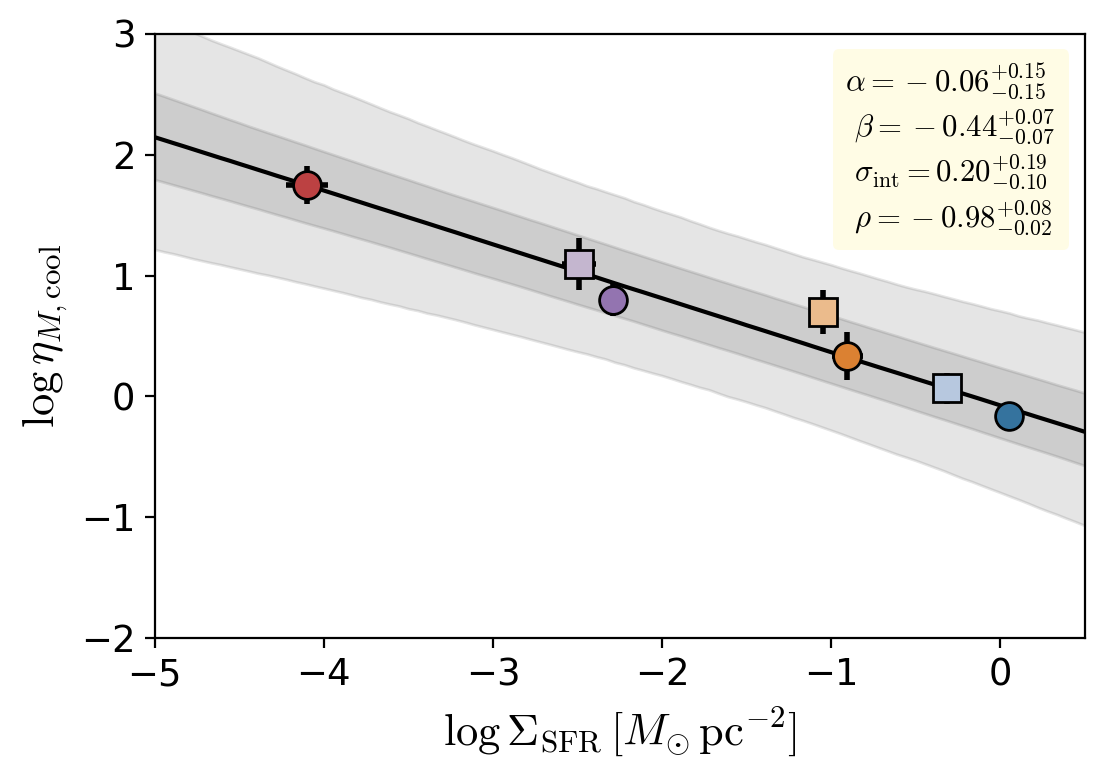

In [29]:
# plot MCMC results as in the paper

for name,c,m in zip(names,colors,markers):
    idx=(tmean['phase'] == ph) & (tmean['z'] == z) & (tmean['model'] == name)
    xmean = tmean[idx][xfield]
    ymean = tmean[idx][yfield]
    xstd = terr[idx][xfield]
    ystd = terr[idx][yfield]
    xlogstd= xstd/xmean/np.log(10)
    ylogstd= ystd/ymean/np.log(10)
    plt.errorbar(np.log10(xmean),np.log10(ymean),
                 xerr=xlogstd,yerr=ylogstd,
                 color=c,marker=m,label=name,
                 elinewidth=2,ecolor='k',markersize=10.0,
                 markeredgecolor='k',markeredgewidth=1,
                )

plot_mcmc_result(lm.chain,-5,0.5,result_str=1,)
plt.ylabel(r'$\log\,\eta_{M, {\rm cool}}$')
plt.xlabel(r'$\log\,$'+xlabel)
plt.ylim(-2,3)
plt.xlim(-5,0.5)